# The Asteroseismic Imprints of Mass Transfer
by [Tom Wagg](https://tomwagg.com)$^{1}$

$^1$[]()_Department of Astronomy, University of Washington, Seattle, WA, USA_

This notebook reproduces the figures and results from our paper.

In [14]:
import os

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.gridspec import GridSpec

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

import astropy.constants as const
import astropy.units as u

from astropy.visualization import quantity_support
quantity_support()

from ipywidgets import interact, IntSlider, FloatSlider

import seaborn as sns

In [15]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Load and prep data

Add some custom imports will Earl's `mesagrid` package and my mesa plotting scripts.

In [16]:
from importlib import reload
import sys
sys.path.append("../")

import mesagrid
reload(mesagrid);

sys.path.append("../helpers")
import mpt

In [17]:
from types import ModuleType
def refresh_mpt():
    rreload(mpt)
    rreload(mpt)

def rreload(module):
    """Recursively reload modules."""
    reload(module)
    for attribute_name in dir(module):
        attribute = getattr(module, attribute_name)
        if type(attribute) is ModuleType:
            if attribute_name in ["hr", "profiles", "period_spacing", "utils"]:
                rreload(attribute)

In [18]:
tracks = {}
for folder, label in zip(["4_3_5_mdm100", "4_3_5_mdm50", "4_3_5_mdm10", "4_3_5_mdm1"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}, D_{\rm min} = 100 \, {\rm cm^2 \, s^{-1}}$",
                          r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}, D_{\rm min} = 50 \, {\rm cm^2 \, s^{-1}}$",
                          r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}, D_{\rm min} = 10 \, {\rm cm^2 \, s^{-1}}$",
                          r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}, D_{\rm min} = 1 \, {\rm cm^2 \, s^{-1}}$"]):
    path = os.path.join("../output/cluster/binaries", folder)
    tracks[folder] = [mesagrid.Track(path, dir_name="LOGS_star1", parameters=f"{label} (Donor)"),
                     mesagrid.Track(path, dir_name="LOGS_star2", parameters=f"{label} (Accretor)")]

In [19]:
D_mix_tracks = {}
for folder, label in zip(["D_15", "D_20", "D_25", "D_30", "D_35", "D_40", "D_45"],
                         [r"$D_{\rm min} = 15 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 20 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 25 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 30 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 35 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 40 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 45 \, {\rm cm^2 \, s^{-1}}$"]):
    path = os.path.join("../output/cluster/binaries/Dmix_grid", folder)
    D_mix_tracks[folder] = [mesagrid.Track(path, dir_name="LOGS_star1", parameters=f"{label} (Donor)"),
                     mesagrid.Track(path, dir_name="LOGS_star2", parameters=f"{label} (Accretor)")]

In [20]:
single_tracks = {}
Ms = np.arange(3.0, 6.1, 0.1)
for M in Ms:
    folder = f"M_{M:1.1f}"
    single_tracks[folder] = mesagrid.Track(dir=f"../output/cluster/singles_grid/{folder}", parameters=folder)

In [21]:
single_tracks_mdm20 = {}
Ms = np.arange(3.0, 6.1, 0.1)
for M in Ms:
    folder = f"M_{M:1.1f}"
    single_tracks_mdm20[folder] = mesagrid.Track(dir=f"../output/cluster/singles_grid_mdm20/{folder}", parameters=folder)

In [22]:
for folder, label in zip(["full_4_3_5_mdm20"],
                         ["whatever"]):
    path = os.path.join("../output/cluster/binaries/", folder)
    tracks[folder] = [mesagrid.Track(path, dir_name="LOGS_star1", parameters=f"{label} (Donor)"),
                     mesagrid.Track(path, dir_name="LOGS_star2", parameters=f"{label} (Accretor)")]

In [23]:
full_single_tracks_mdm20 = {}
Ms = np.arange(3.0, 6.1, 0.1)
for M in Ms:
    folder = f"M_{M:1.1f}"
    full_single_tracks_mdm20[folder] = mesagrid.Track(dir=f"../output/cluster/singles_grid_mdm20_he4/{folder}", parameters=folder)

# Binary Evolution

We can first consider how our simulated binary evolves and compare it to an equivalent single star.

## HR Diagram

Parsing $D_{\rm min} = 20 \, {\rm cm^2 \, s^{-1}}$ (Donor)
Parsing M_3.0
Parsing M_3.1
Parsing M_3.2
Parsing M_3.3
Parsing M_3.4
Parsing M_3.5
Parsing M_3.6
Parsing M_3.7
Parsing M_3.8
Parsing M_3.9
Parsing M_4.0
Parsing $D_{\rm min} = 20 \, {\rm cm^2 \, s^{-1}}$ (Accretor)


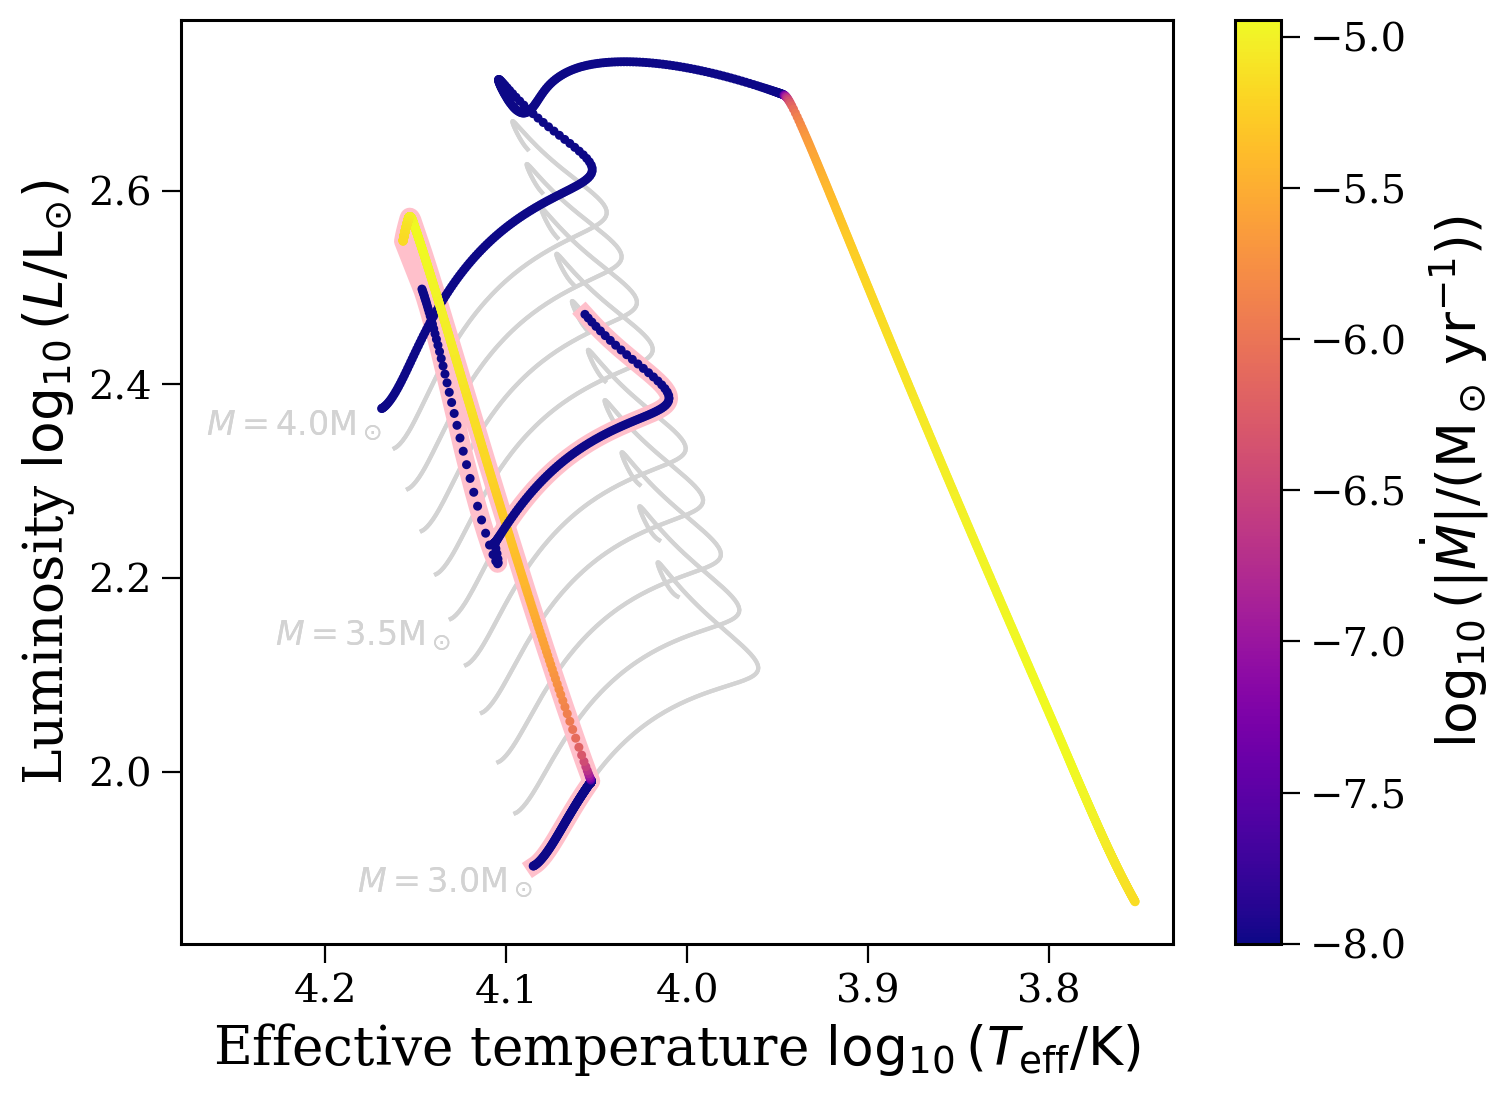

In [12]:
refresh_mpt()
for folder, label in zip(["D_20"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$"]):
    fig, ax = None, None
    for track, cmap in zip(D_mix_tracks[folder], ["plasma", "plasma"]):
        fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=5, cmap=cmap,
                                cbar_var="log_abs_mdot",
                                cbar_label=r"$\log_{10} (|\dot{M}| / ({\rm M_\odot \, yr^{-1}}))$",
                                vmin=-8, inset_cbar=False, rasterized=True)
        fig, ax = mpt.add_singles_tracks(fig, ax, single_tracks_mdm20, Ms=np.arange(3.0, 4.1, 0.1))
    ax.set_xlim(left=4.28)

    cut = int(mpt.find_closest_model_number(track, X_c=0.69))
    ax.plot(track.history.loc[cut:]["log_Teff"], track.history.loc[cut:]["log_L"], color="pink",
            linewidth=6.5, zorder=-1)

    plt.savefig("../paper/figures/HRD_binary.pdf", format="pdf", bbox_inches="tight", dpi=300)
    plt.show()

Parsing whatever (Donor)
Parsing M_3.0
Parsing M_3.1
Parsing M_3.2
Parsing M_3.3
Parsing M_3.4
Parsing M_3.5


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

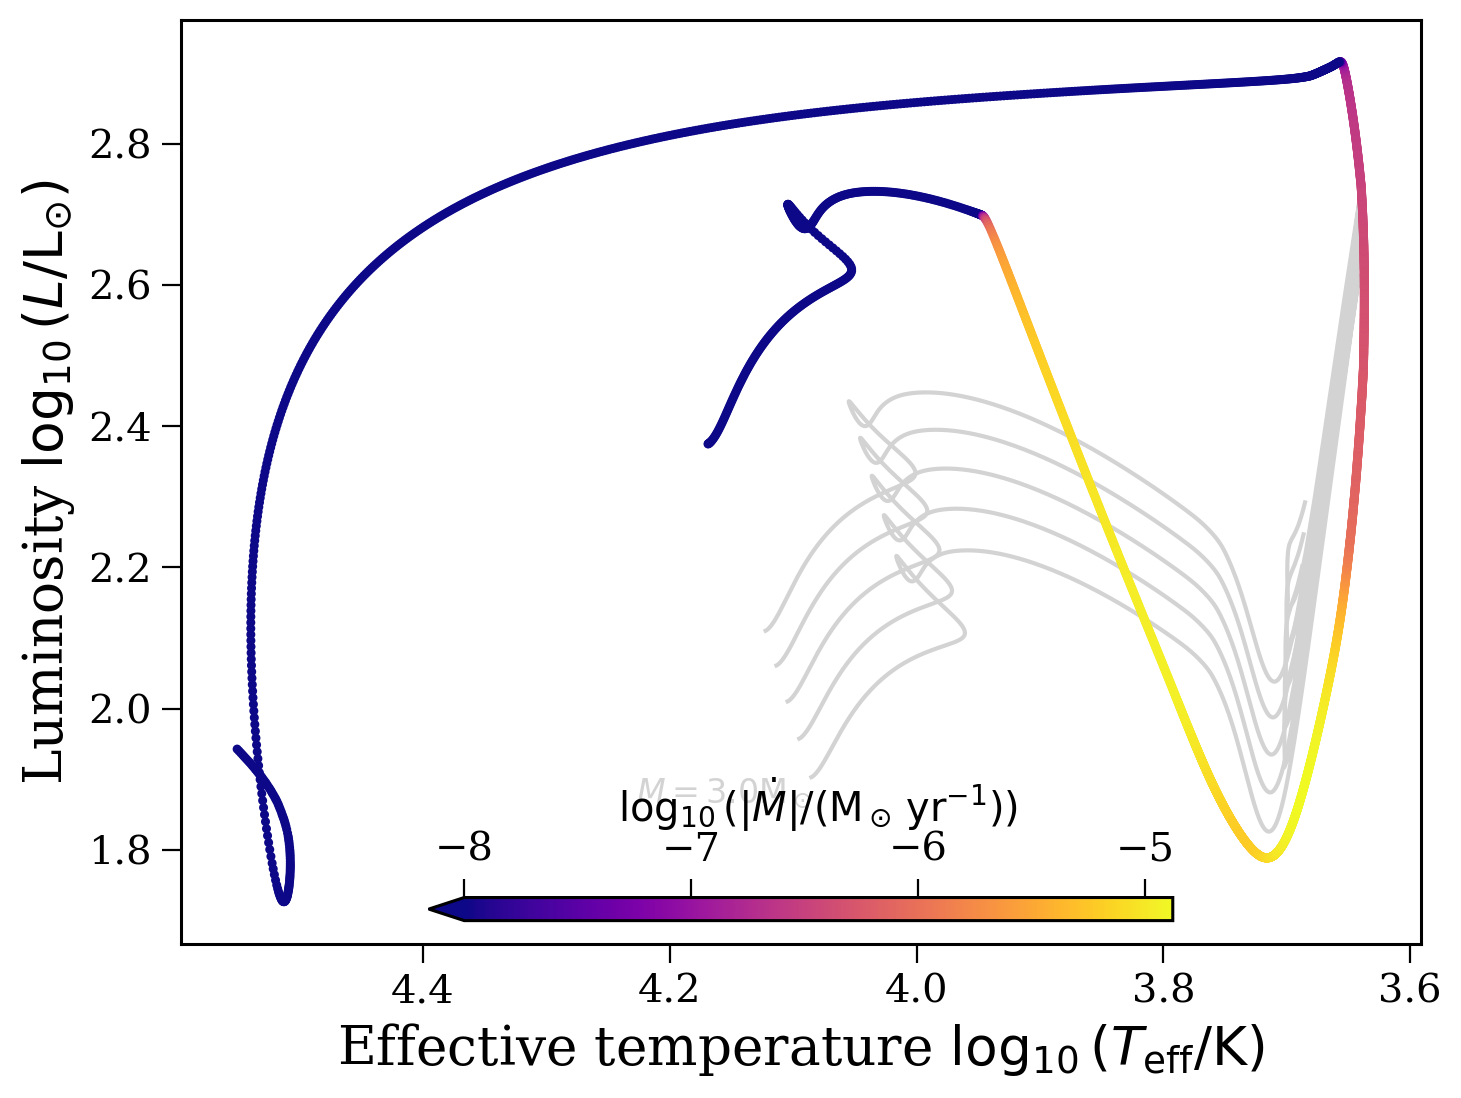

In [13]:
refresh_mpt()
fig, ax = None, None
for track, cmap in zip([tracks["full_4_3_5_mdm20"][0], D_mix_tracks["D_20"][1]], ["plasma", "plasma"]):
    fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=5, cmap=cmap,
                            cbar_var="log_abs_mdot",
                            cbar_label=r"$\log_{10} (|\dot{M}| / ({\rm M_\odot \, yr^{-1}}))$",
                            cbar_loc=[0.2, 0.025, 0.6, 0.025],
                            vmin=-8, inset_cbar=True, rasterized=True)
    fig, ax = mpt.add_singles_tracks(fig, ax, full_single_tracks_mdm20, Ms=np.arange(3.0, 4.1, 0.1))
# ax.set_xlim(left=4.28)
ax.set_ylim(bottom=1.55)

cut = int(mpt.find_closest_model_number(track, X_c=0.69))
ax.plot(track.history.loc[cut:]["log_Teff"], track.history.loc[cut:]["log_L"], color="pink",
        linewidth=6.5, zorder=-1)

for xy, offset, c in [(mpt.get_hr_position(tracks["full_4_3_5_mdm20"][0], "zams"), (0.05, 0.07), 'D1'),
                      (mpt.get_hr_position(tracks["full_4_3_5_mdm20"][0], "mt_start"), (-0.05, 0.07), 'D2'),
                      (mpt.get_hr_position(tracks["full_4_3_5_mdm20"][0], "closest_approach"), (-0.04, -0.08), 'D3'),
                      (mpt.get_hr_position(tracks["full_4_3_5_mdm20"][0], "mt_end"), (0.02, -0.1), 'D4'),
                      (mpt.get_hr_position(tracks["full_4_3_5_mdm20"][0], "cheb"), (0.02, -0.1), 'D5'),
                      (mpt.get_hr_position(D_mix_tracks["D_20"][1], "zams"), (0.05, 0.07), 'A1'),
                      (mpt.get_hr_position(D_mix_tracks["D_20"][1], "mt_start"), (-0.04, -0.08), 'A2'),
                      (mpt.get_hr_position(D_mix_tracks["D_20"][1], "mt_end"), (0.01, 0.1), 'A3'),
                      (mpt.get_hr_position(D_mix_tracks["D_20"][1], "cheb"), (-0.05, 0.02), 'A4')]:
    ax.annotate(c, xytext=(xy[0] + offset[0], xy[1] + offset[1]), xy=xy,
                ha="center", va="center", color="black", fontsize=0.5*fs,
                arrowprops=dict(arrowstyle="-|>", color="black"), bbox=dict(pad=-2, fc="none", ec="none"))

plt.savefig("../paper/figures/HRD_binary_full_labelled.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

## Radius Evolution

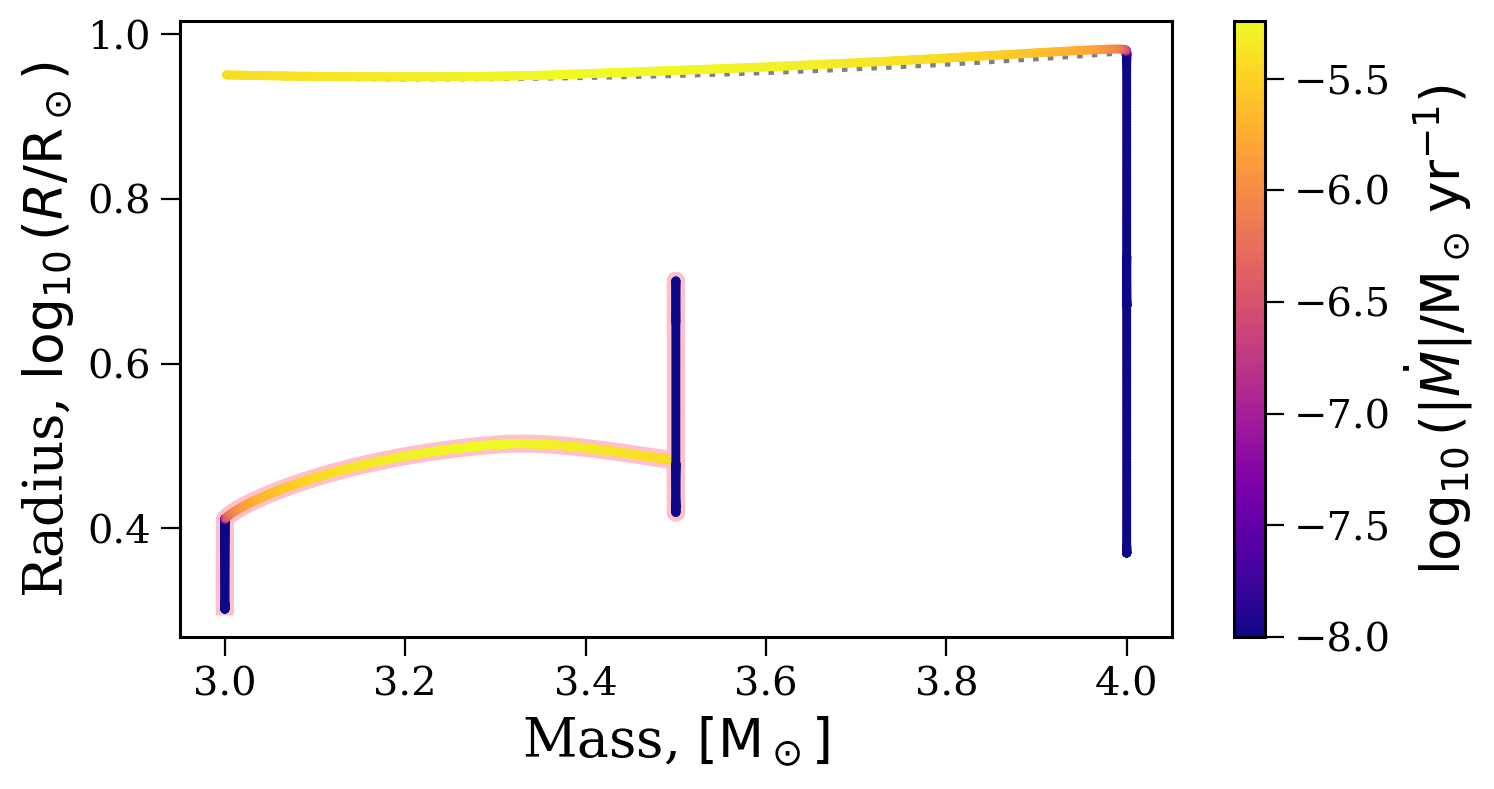

In [15]:
for folder, label in zip(["4_3_5_mdm100"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$"]):
    fig, ax = plt.subplots(figsize=(8, 4))
    for track in tracks[folder]:
        scatter = ax.scatter(track.history["star_mass"], track.history["log_R"], c=track.history["log_abs_mdot"],
                            vmin=-8, s=5, cmap="plasma")
        
    cut = int(mpt.find_closest_model_number(track, X_c=0.69))
    ax.plot(track.history.loc[cut:]["star_mass"], track.history.loc[cut:]["log_R"], color="pink",
            linewidth=6.5, zorder=-1)

    cbar = fig.colorbar(scatter, label=r"$\log_{10} (|\dot{M}| / {\rm M_\odot \, yr^{-1}})$")

    ylims = ax.get_ylim()


    ax.plot(tracks[folder][0].history["star_mass"], np.log10(tracks[folder][0].history["rl_1"]),
            color="grey", linestyle="dotted", lw=2, zorder=-1)
    ax.set_ylim(ylims)

    ax.set_xlabel(r"Mass, $[\rm M_\odot]$")
    ax.set_ylabel(r"Radius, $\log_{10} (R / {\rm R_\odot})$")

    plt.show()

## $X_H$ profile evolution

In [24]:
X_c_panels = [0.69905, 0.53, 0.47, 0.3, 0.1, 0.01]

### Separate Panels

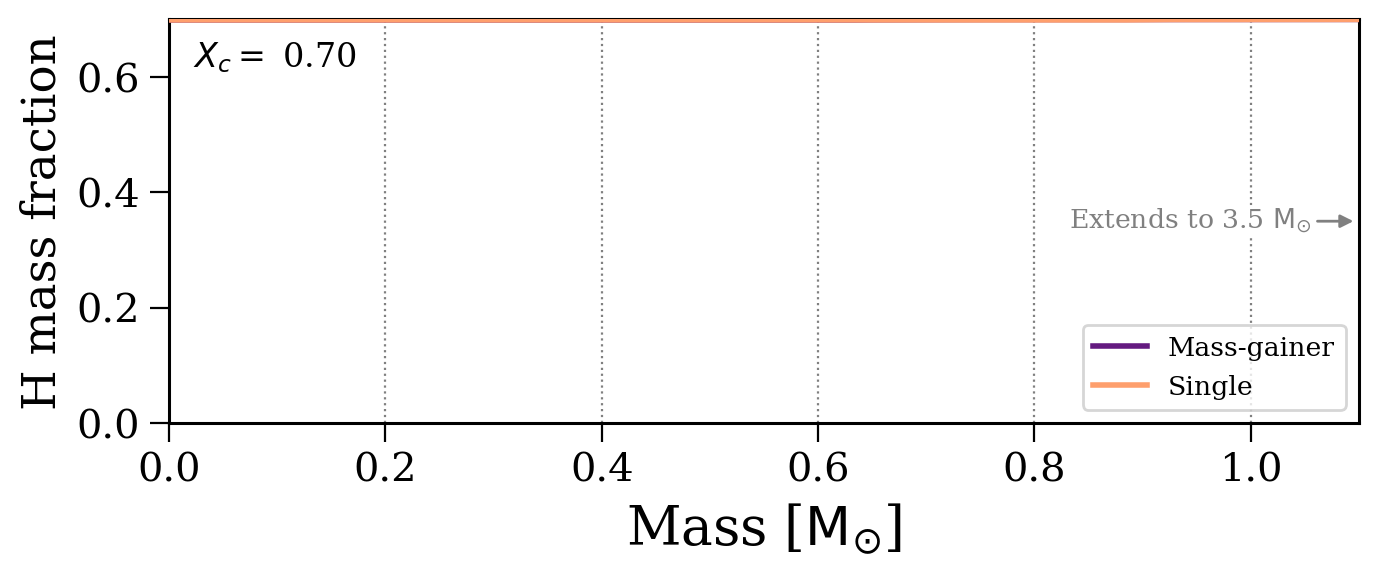

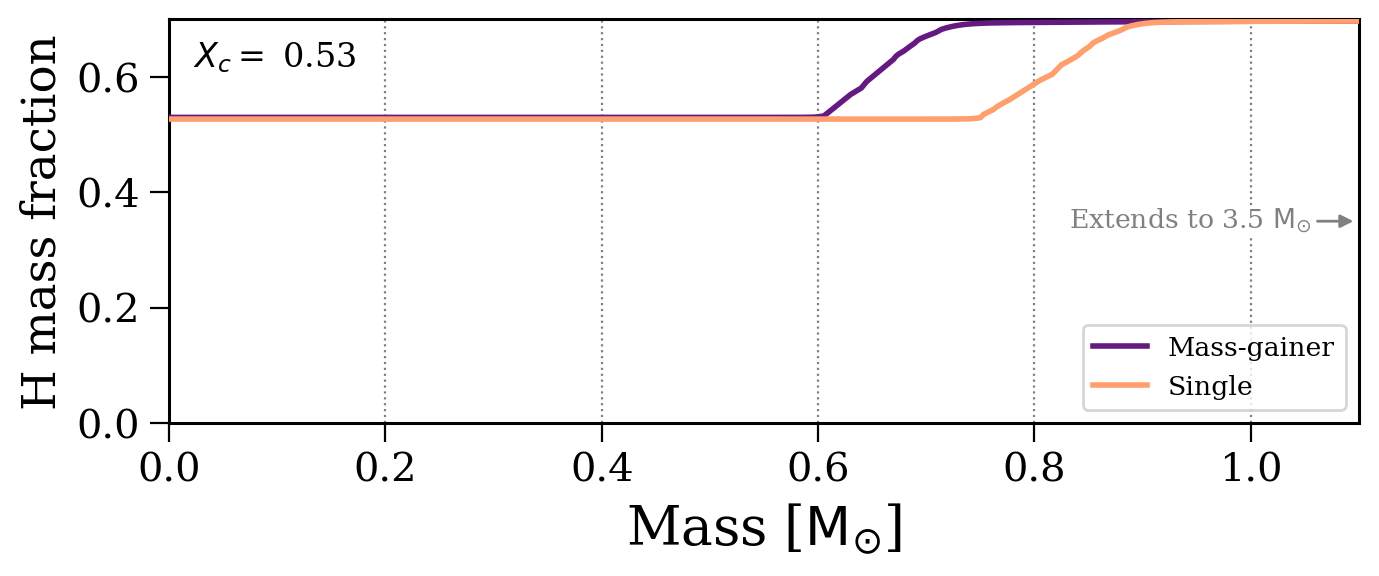

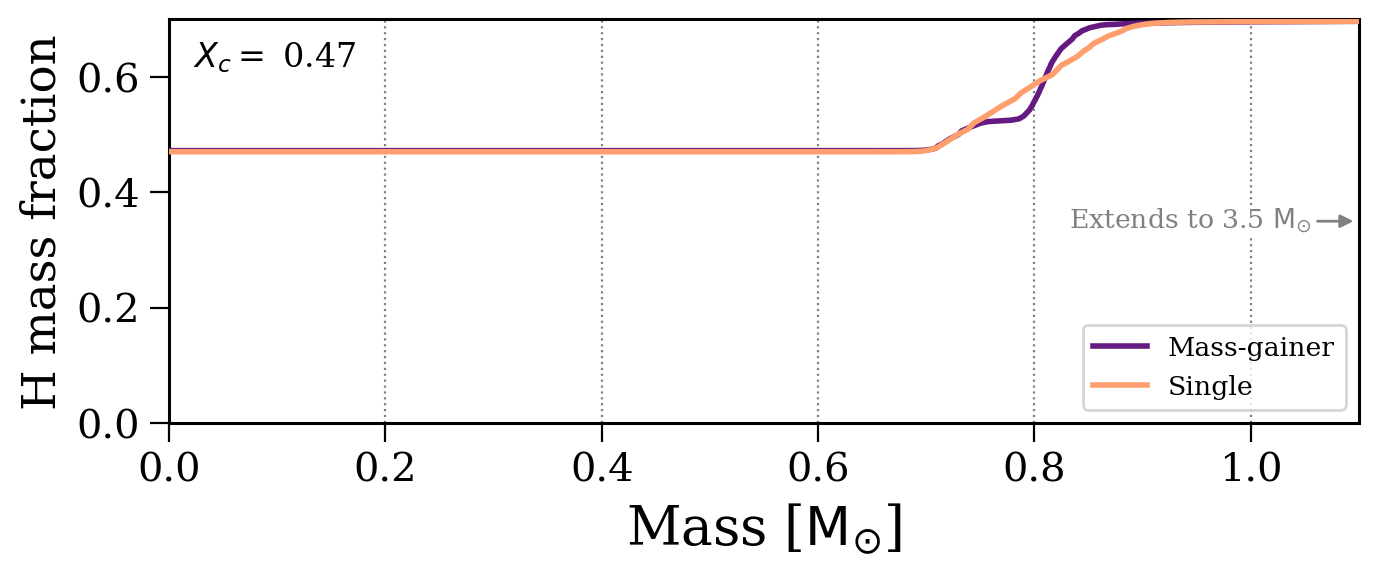

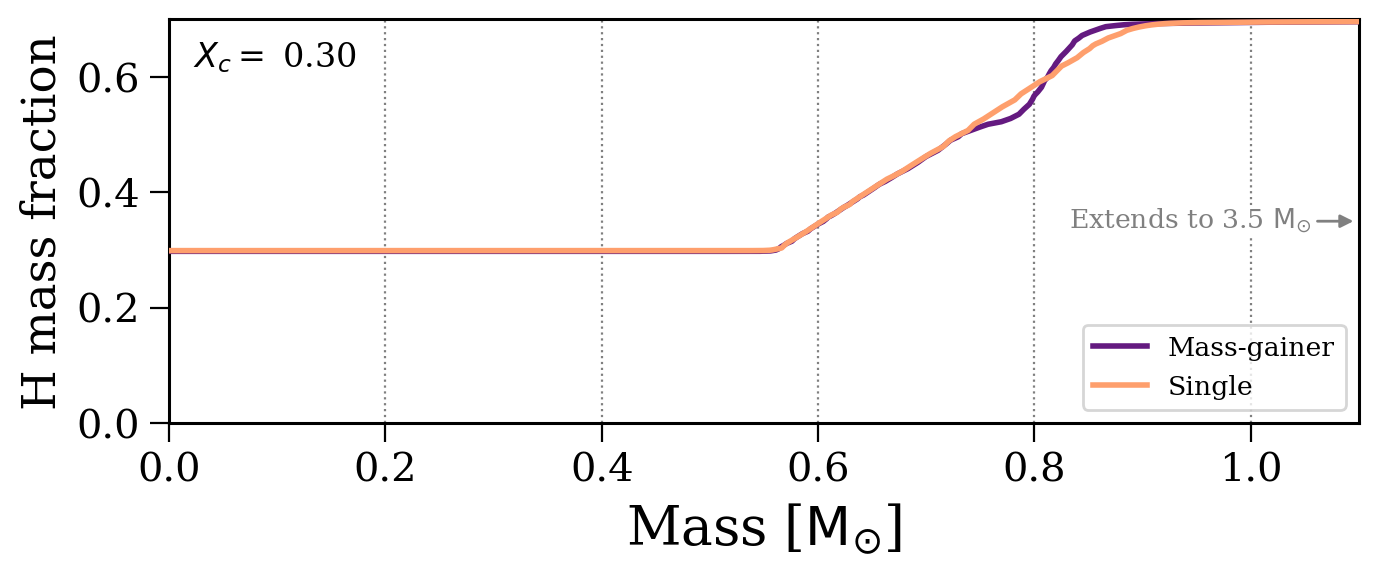

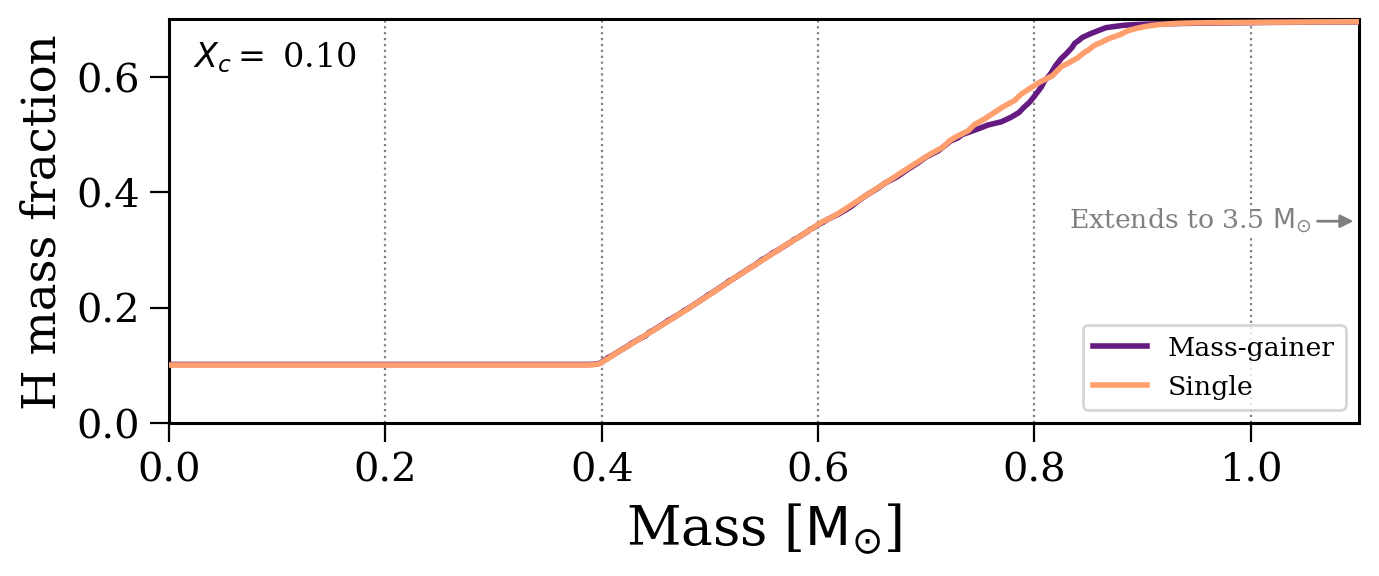

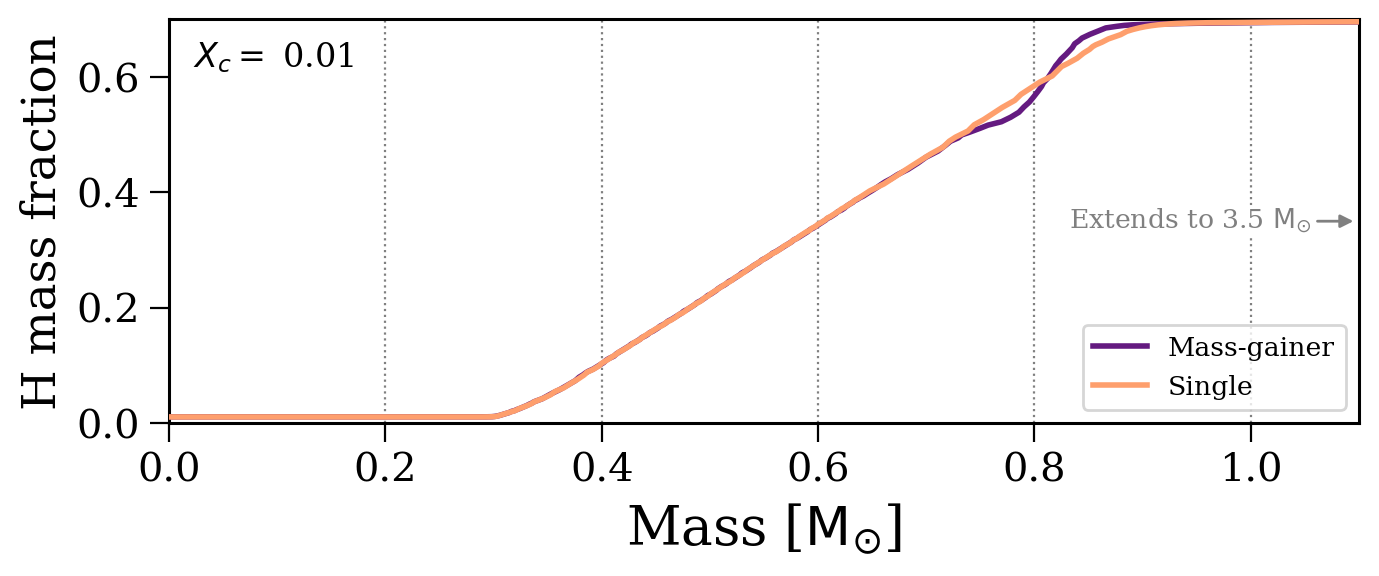

In [53]:
refresh_mpt()
for X_c in X_c_panels:
    fig, ax = mpt.plot_X_H_profile(X_c=X_c, tracks=[D_mix_tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                                   show=False, label_with="an", annotate_col="grey")
    ax.grid(axis="x", linestyle="dotted", color="grey")
    # plt.savefig(f"presentation_plots/X_H_profile_mdm20_Xc_{X_c}.png", format="png", bbox_inches="tight", dpi=300)

### Group of subplots

/afs/mpa/temp/tomwagg/kavli/notebooks/../helpers/profiles.py:51: UserWarning: The figure layout has changed to tight
  


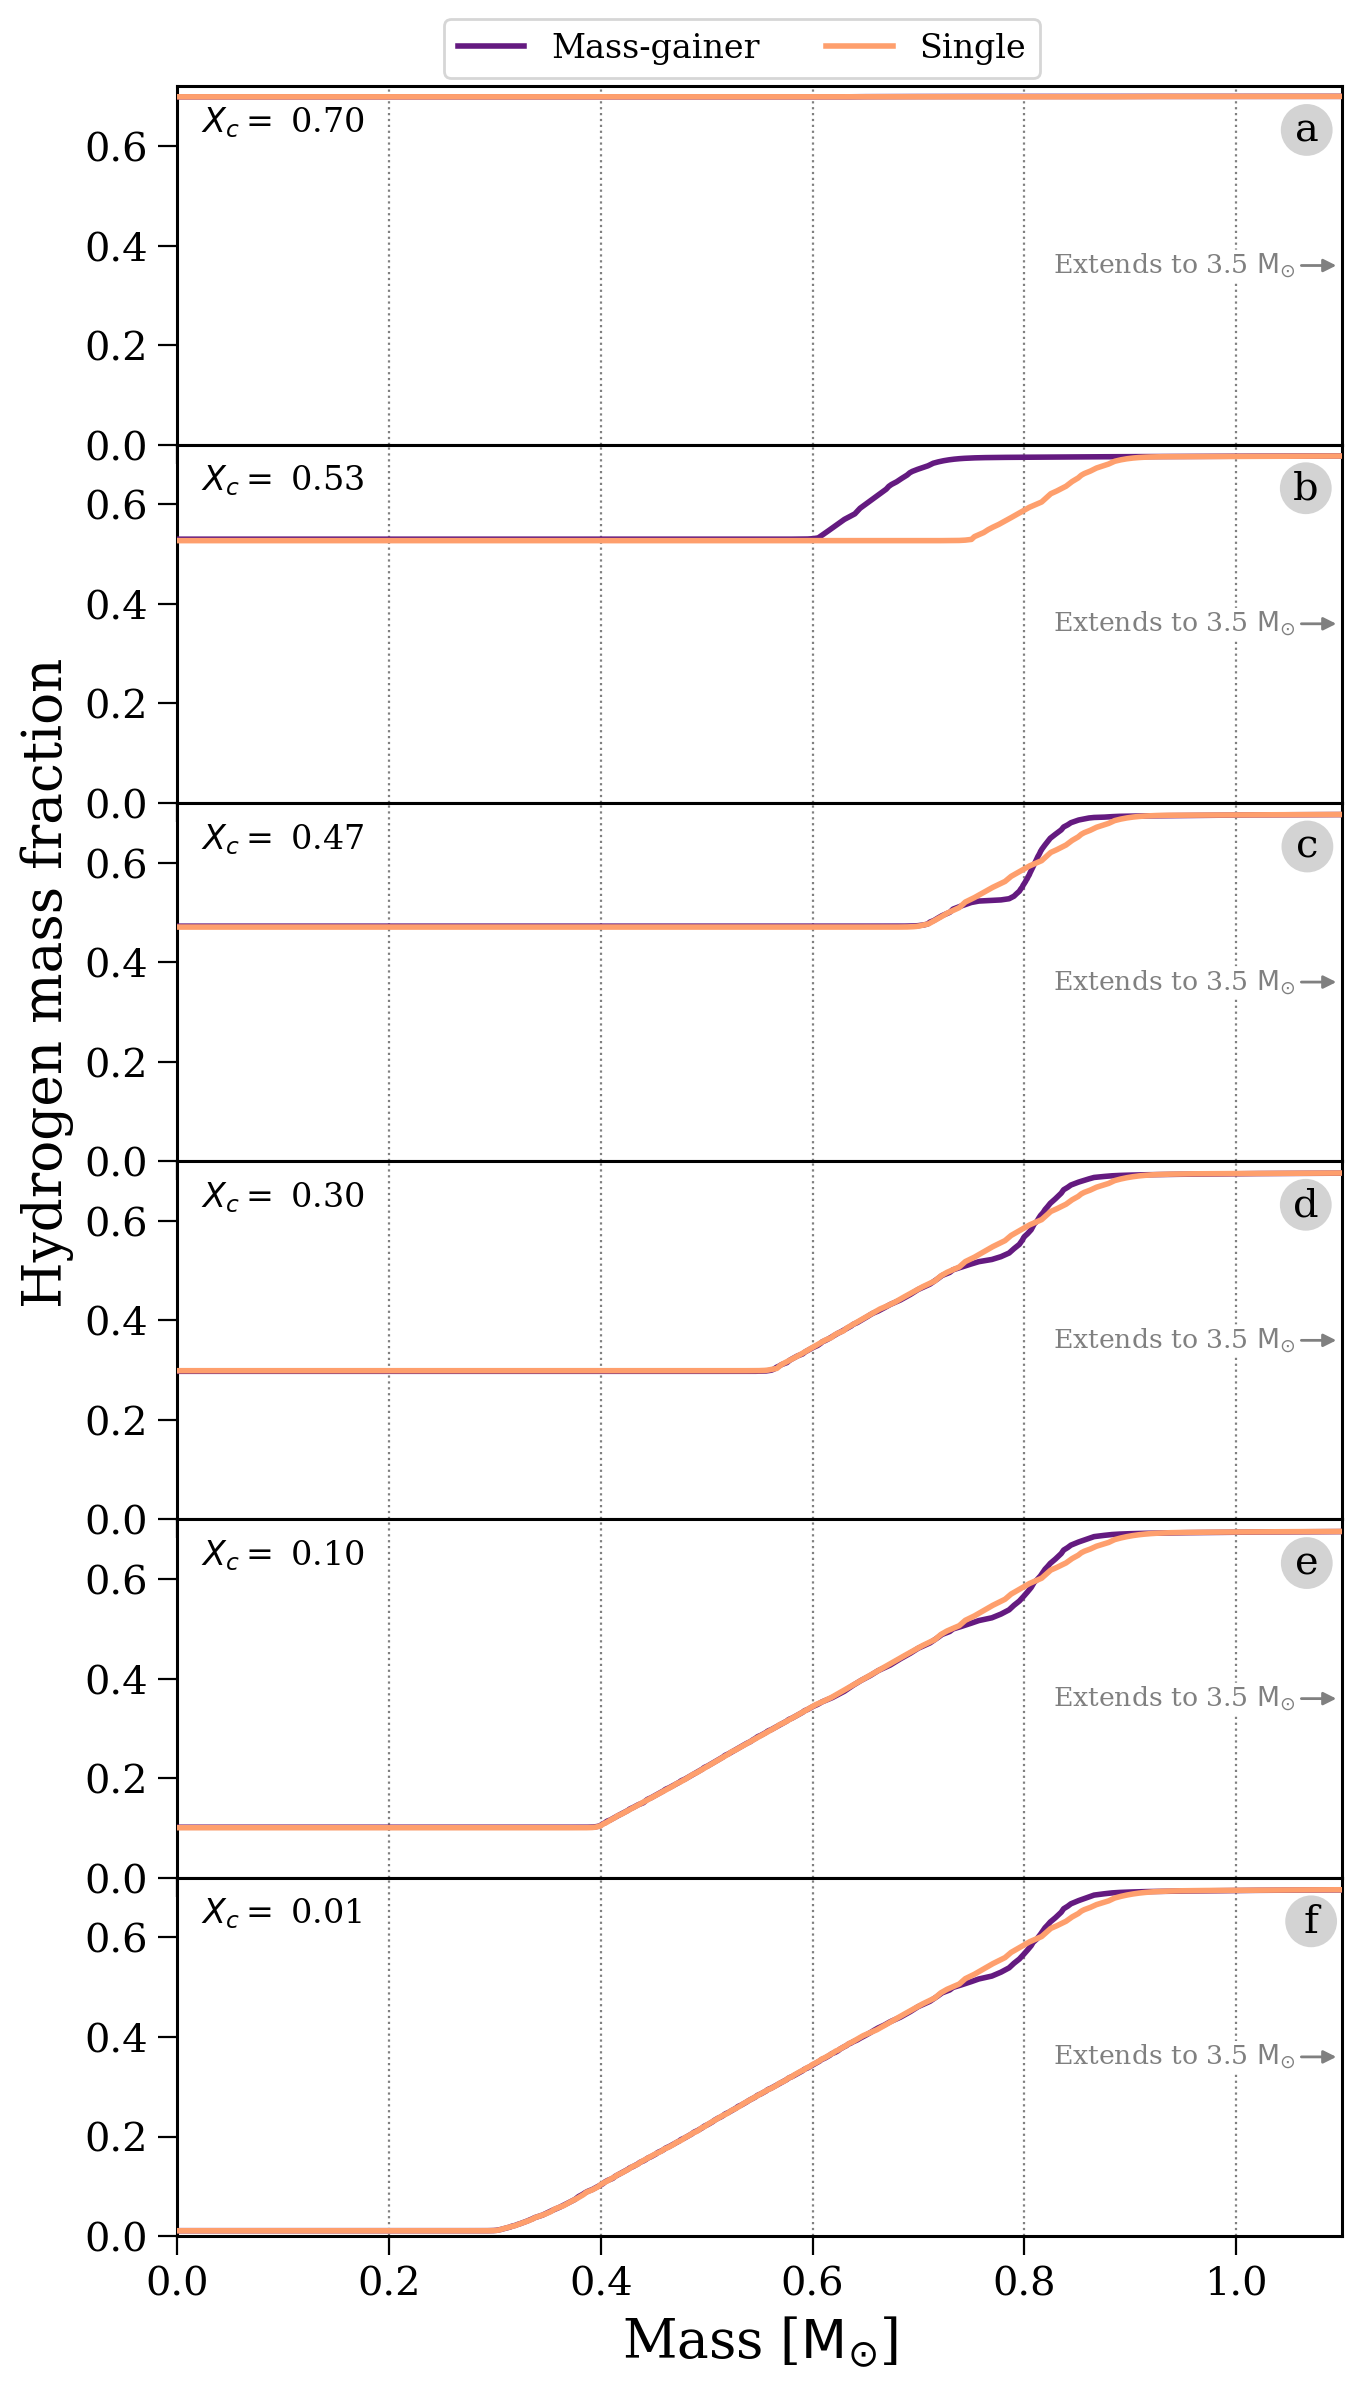

In [100]:
refresh_mpt()
fig, axes = plt.subplots(len(X_c_panels), 1, figsize=(7, 12), sharex=True)
for X_c, ax in zip(X_c_panels, axes):
    mpt.plot_X_H_profile(X_c=X_c, tracks=[D_mix_tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                         fig=fig, ax=ax, show=False, label_with="an", annotate_col="grey")
    ax.grid(axis="x", linestyle="dotted", color="grey")

for ax, letter in zip(axes, "abcdef"):
    if ax != axes[-1]:
        ax.set_xlabel("")
    ax.set_ylabel("Hydrogen mass fraction" if ax == axes[2] else "", fontsize=0.8*fs)
    ax.get_legend().remove()
    ax.set_ylim(top=0.72)

    ax.annotate(letter, xy=(0.98, 0.93), xycoords="axes fraction", ha="right", va="top", fontsize=0.6*fs,
                bbox=dict(boxstyle="circle", fc="lightgrey", ec="lightgrey", pad=0.15))


fig.legend(*ax.get_legend_handles_labels(), loc="upper center", bbox_to_anchor=(0.55, 1, 0, 0),
           fontsize=0.5*fs, ncol=2)

fig.subplots_adjust(hspace=0.0, top=0.965)
plt.savefig("../paper/figures/XH_profile_all.pdf")
plt.show()

### Zoom in during mass transfer

In [ ]:
mpt.set_styles()

In [18]:
def get_years_after_mod(track, mod, years, verbose=True):
    start_time = track.history.loc[mod - 1]["star_age"]
    end_time = start_time + years
    
    diff = np.abs(track.history["star_age"].values - end_time)
    argmin_diff = np.argmin(diff)
    
    actual_time_step = track.history["star_age"].values[np.argmin(diff)] - start_time

    if verbose:
        print(f"The closest time I can find is {actual_time_step / 1e3:1.2f} kyr after this model")
    
    return track.history["model_number"][argmin_diff]

In [30]:
def accretor_rel_MT(track, years=None, rel_to="start", n_steps=5, offset=0, extra_title=None, verbose=False,
                    cmap=plt.get_cmap("cividis_r"), show=True):

    if rel_to == "both":
        accretor_rel_MT(track, years=years, rel_to="start", n_steps=n_steps, offset=offset, extra_title=extra_title, cmap=cmap)
        accretor_rel_MT(track, years=years, rel_to="end", n_steps=n_steps, offset=offset, extra_title=extra_title, cmap=cmap)
        return

    mt_mod_nums = track.history[track.history["log_abs_mdot"] > -10.0]["model_number"]
    mt_start, mt_end = mt_mod_nums.min(), mt_mod_nums.max()

    if years is None:
        if rel_to == "start":
            t_start, t_end = track.history.loc[mt_start - 1]["star_age"], track.history.loc[mt_end - 1]["star_age"]
            t_end += offset
            years = np.geomspace(5e4, t_end - t_start, n_steps)
        else:
            t_start, t_end = track.history.loc[mt_end - 1]["star_age"], track.history.iloc[-1]["star_age"]
            years = np.linspace(t_start, t_end, n_steps) - t_start + offset

    fig, axes = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={"width_ratios": [16, 1]})
    fig.subplots_adjust(wspace=0.0)

    ax, cbar_ax = axes

    colours = cmap(np.linspace(0, 1, len(years)))
    inds = range(len(years))

    for year, col, ind in zip(years, colours, inds):
        mod = get_years_after_mod(track, mt_start if rel_to == "start" else mt_end, year, verbose=verbose)
        ax.plot(track.profiles[mod - 1]["mass"], track.profiles[mod - 1]["x_mass_fraction_H"], color=col,
                zorder=10 + len(years) - ind, lw=2)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)

    if rel_to == "start":
        bounds = (years / 1e6).round(2)#np.log10(years)
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

        fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                     cax=cbar_ax, label=r"$t - t_{\rm MT, start} \, [\rm Myr]$")
        
        ax.set_ylim(0.4, 0.8)
        ax.set_xlim(0.5, 0.9)
    else:
        norm = mpl.colors.Normalize(vmin=min(years) / 1e6, vmax=max(years) / 1e6)

        cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm)
        cb1.ax.tick_params(labelsize=0.5*fs)
        cb1.set_label(f"Time after mass\ntransfer {'starts' if rel_to == 'start' else 'ends'} [Myr]", fontsize=0.5*fs)

    ax.set_xlabel(r"Mass $\rm [M_{\odot}]$")
    ax.set_ylabel(r"Hydrogren mass fraction", fontsize=0.7*fs)

    # title = f"Accretor composition ({'During' if rel_to == 'start' else 'Post'} MT)"
    # title = title + f" - {extra_title}" if extra_title is not None else title
    # ax.set_title(title)

    if show:
        plt.show()
    return fig, ax

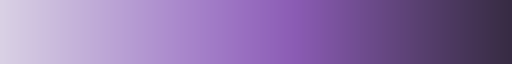

In [33]:
def cmap_from_colour(colour):
    r, g, b, _ = mpl.colors.to_rgba(colour)
    h, s, l = sns.external.husl.rgb_to_husl(r, g, b)
    xx = np.linspace(-1, 1, int(1.15 * 256))[:256]
    ramp = np.zeros((256, 3))
    ramp[:, 0] = h
    ramp[:, 1] = s * np.cos(xx)
    ramp[:, 2] = np.linspace(20, 85, 256)
    colors = np.clip([sns.external.husl.husl_to_rgb(*hsl) for hsl in ramp], 0, 1)
    return mpl.colors.ListedColormap(colors[::-1])
cmap_from_colour("tab:purple")

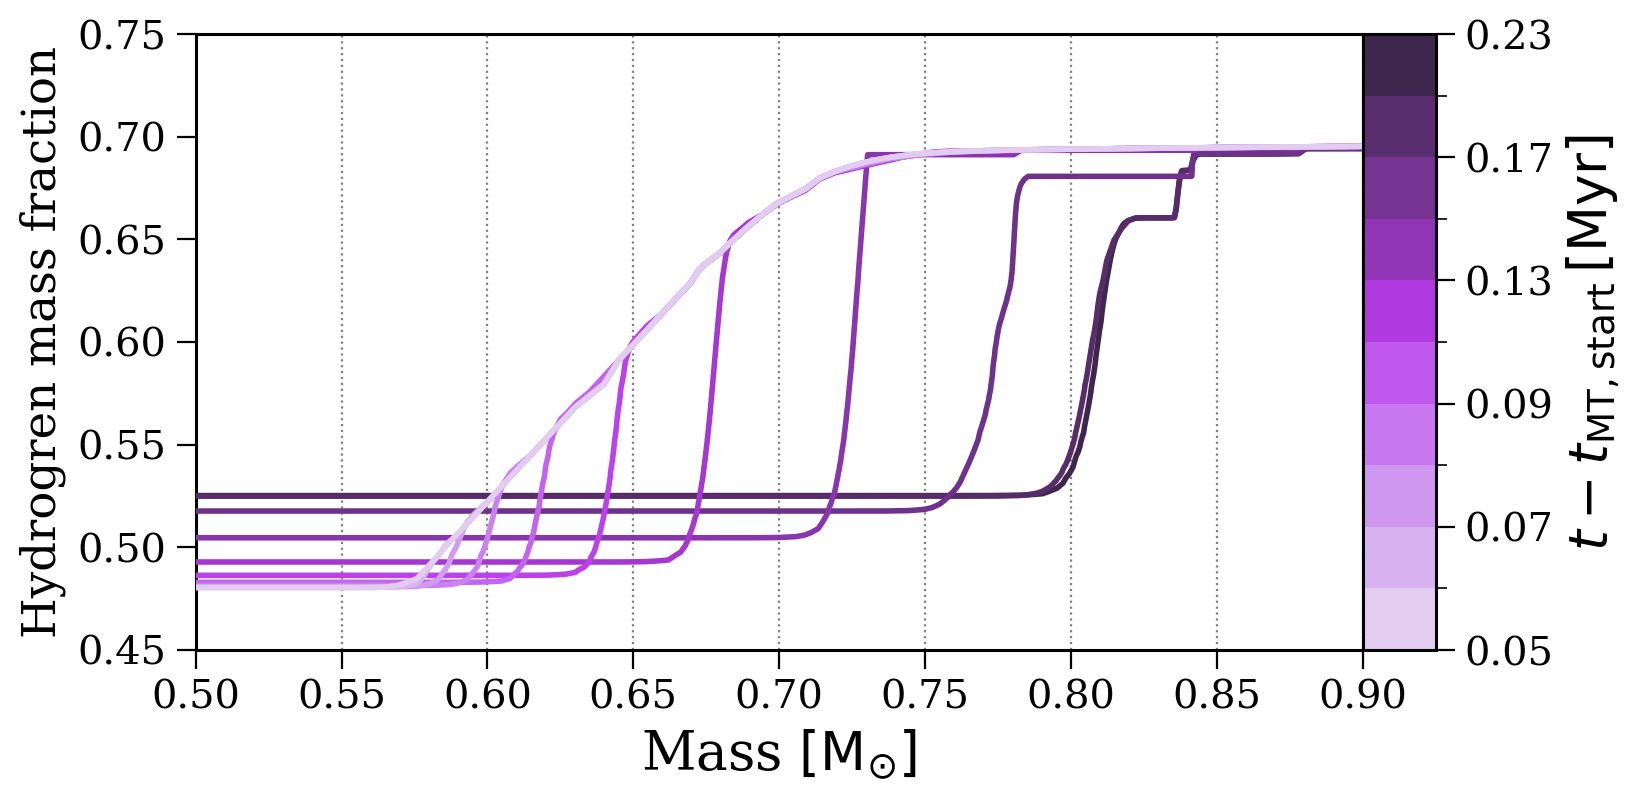

In [37]:
fig, ax = accretor_rel_MT(track=D_mix_tracks["D_20"][1], rel_to='start', offset=7e4, n_steps=11,
                          cmap=cmap_from_colour(mpt.mass_gainer_col), show=False)

ax.grid(axis="x", linestyle="dotted", color="grey")
ax.set_ylim(0.45, 0.75)

plt.savefig("../paper/figures/XH_profile_zoom_MT.pdf", format="pdf", bbox_inches="tight")

plt.show()

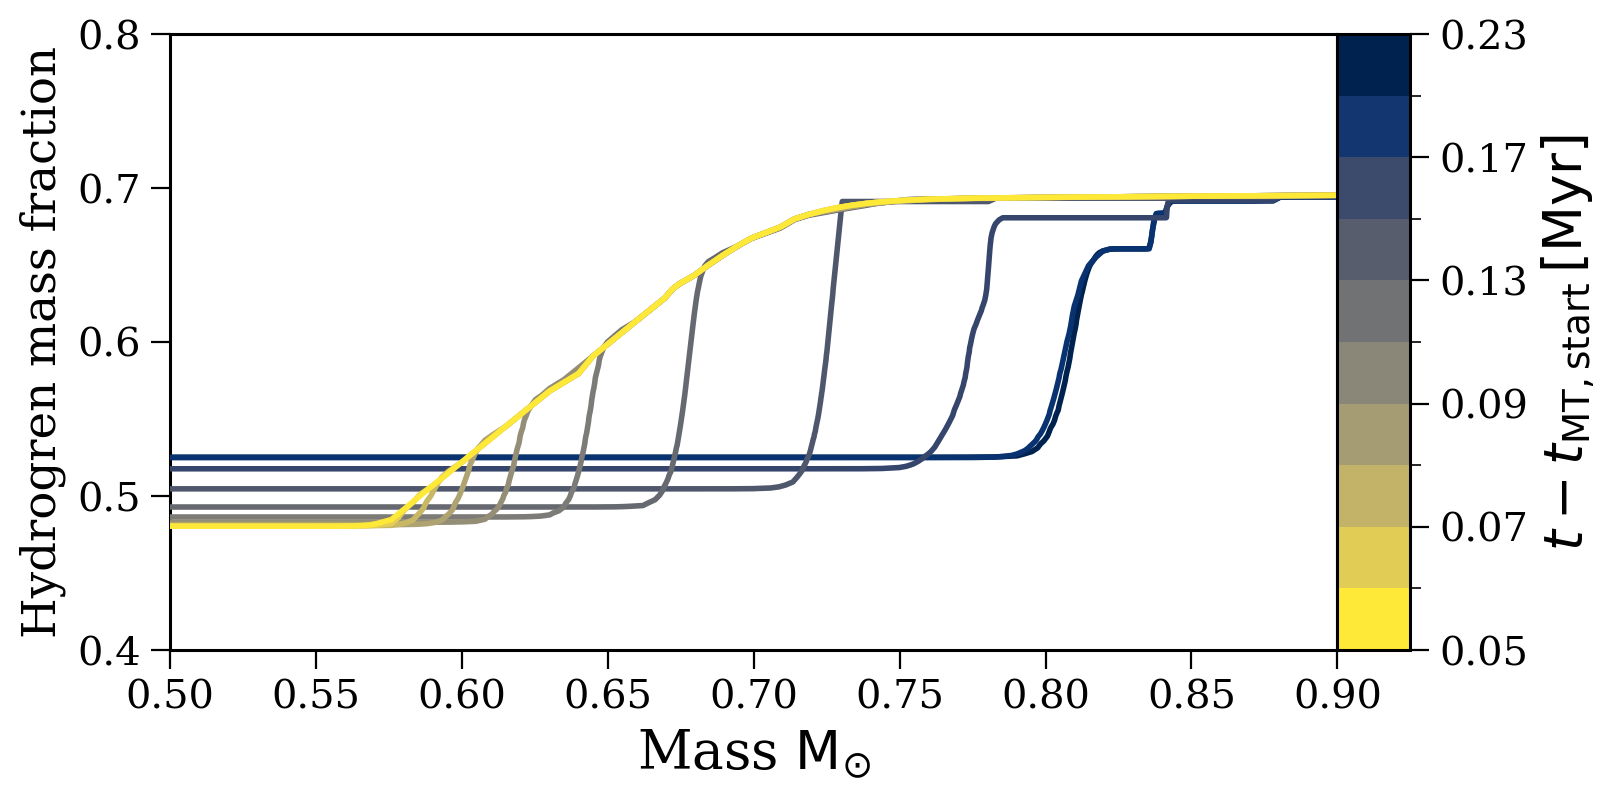

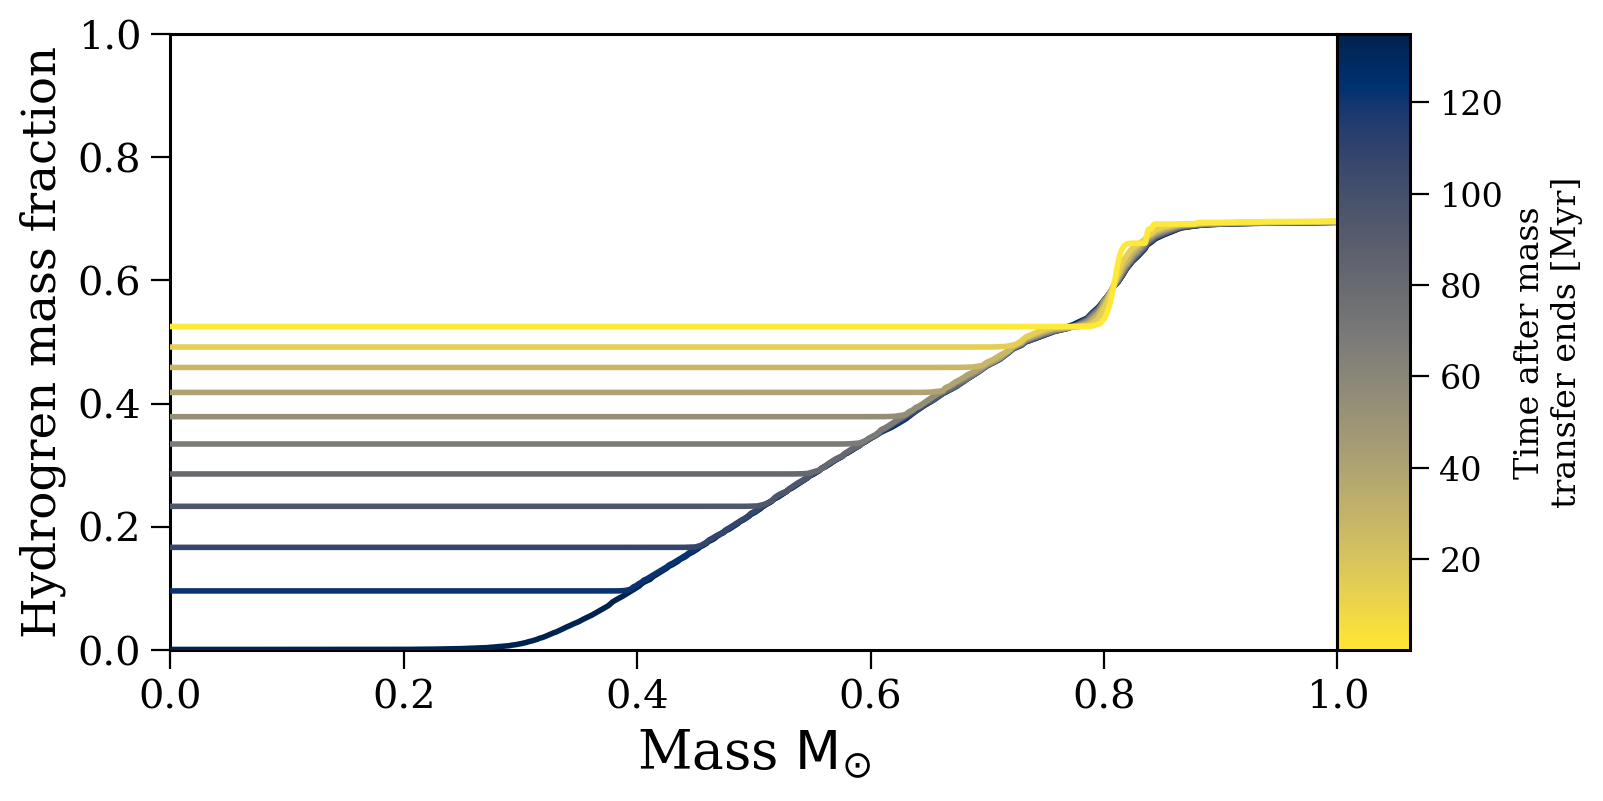

In [296]:
accretor_rel_MT(track=D_mix_tracks["D_20"][1], rel_to='both', offset=7e4, n_steps=11, cmap=mpl.cm.cividis_r)

# Asteroseismic Signals

## Brunt-Vaisala Profiles

### Separate Panels

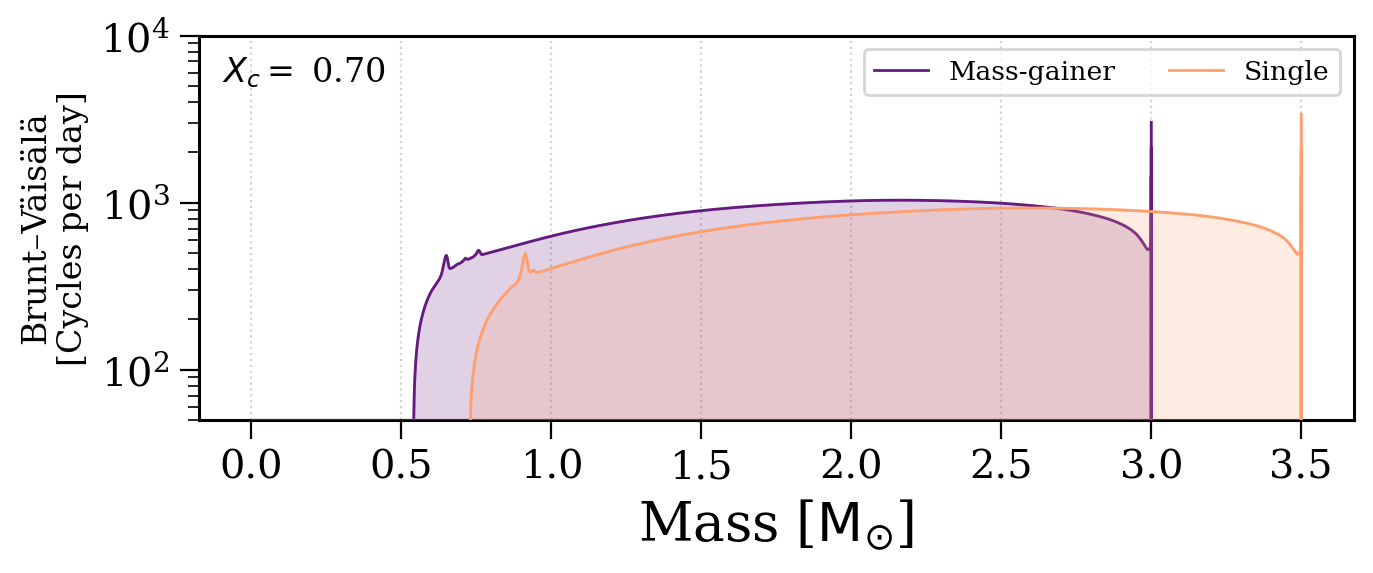

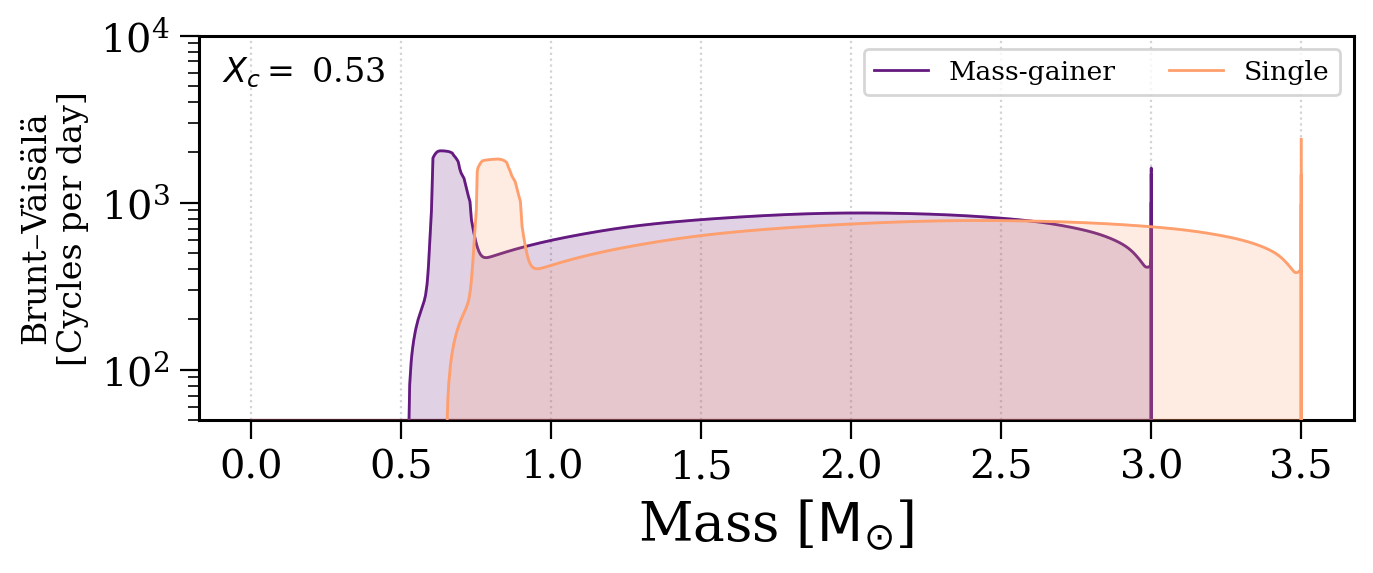

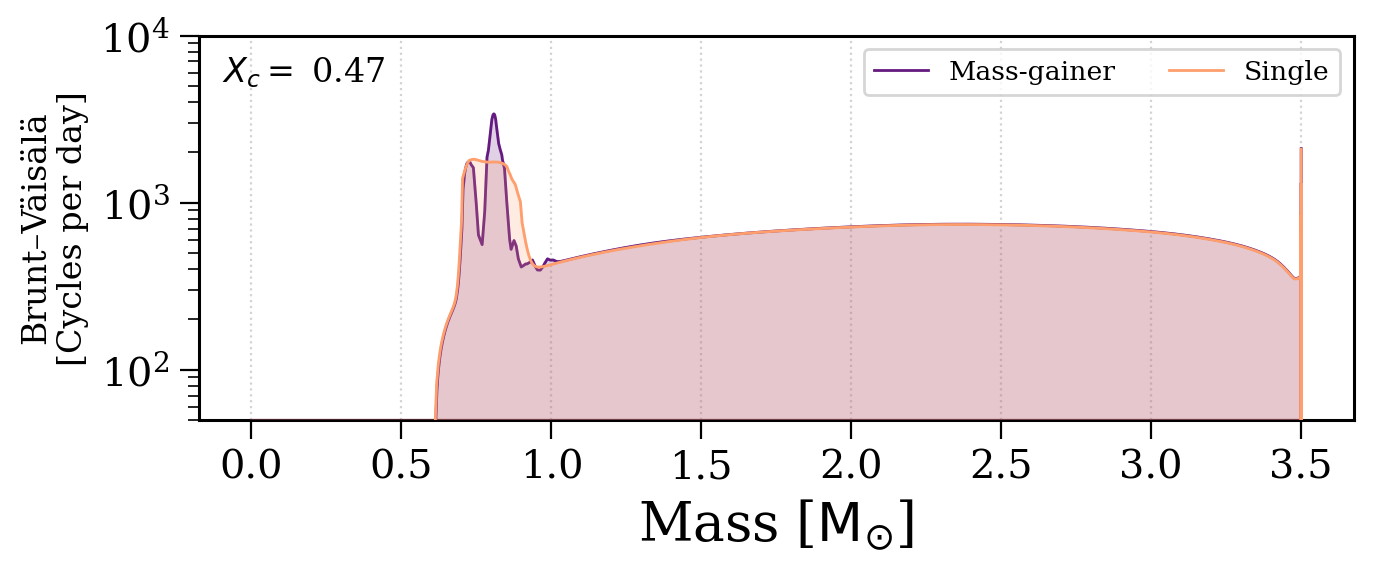

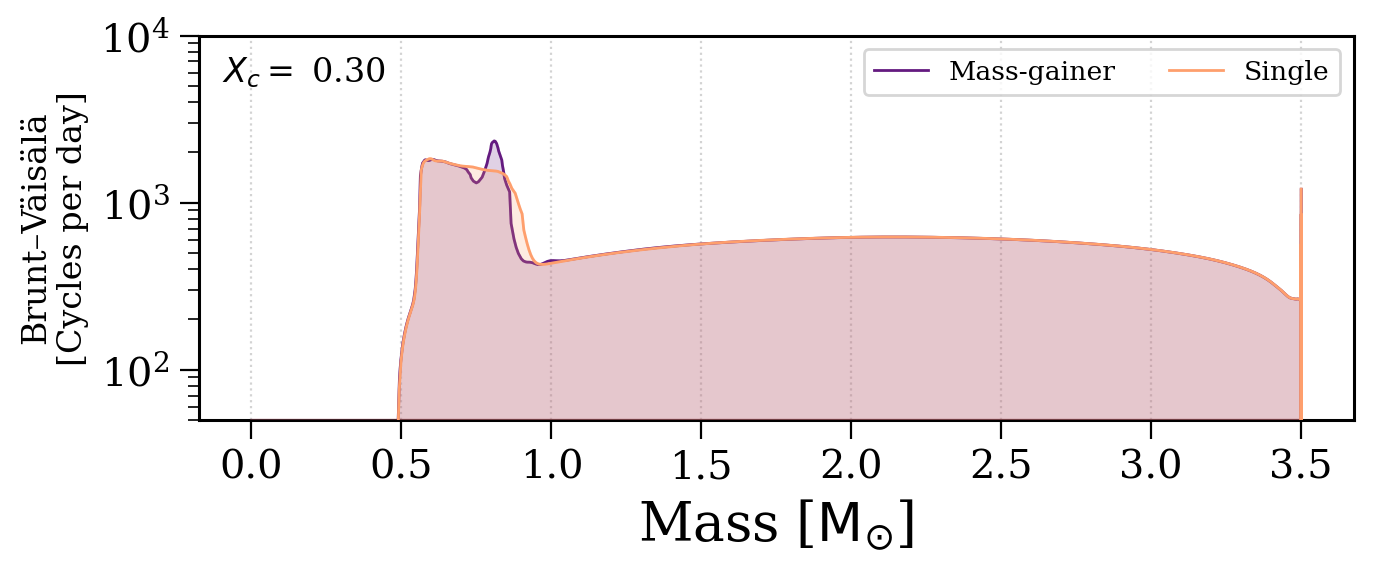

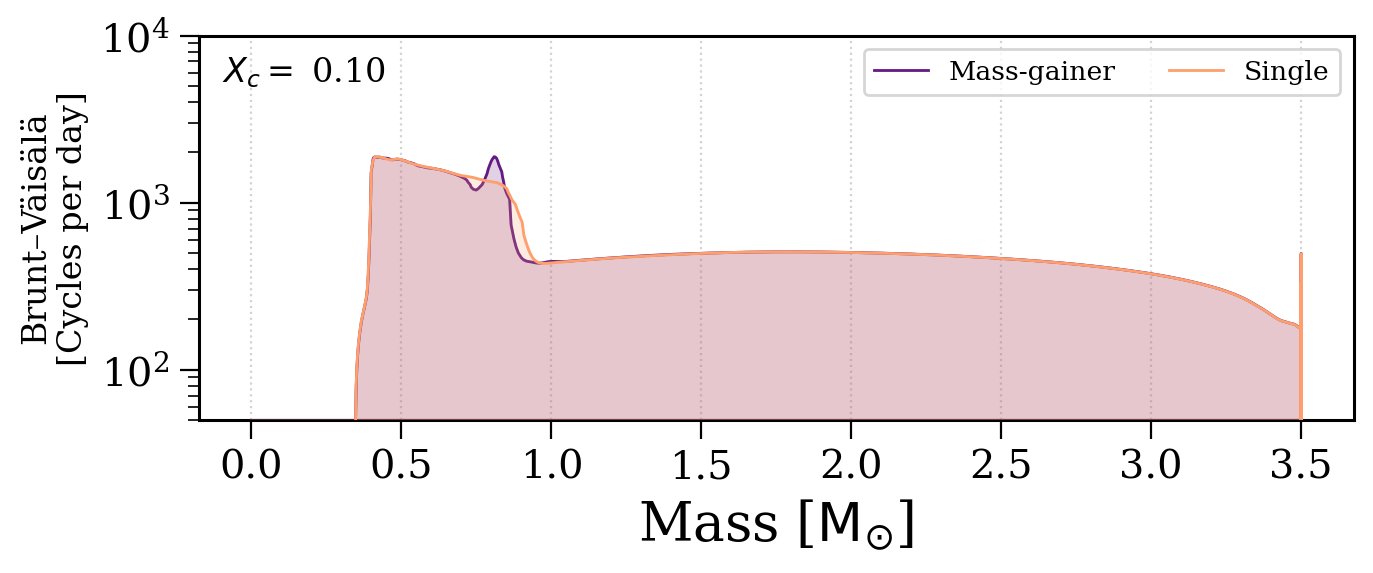

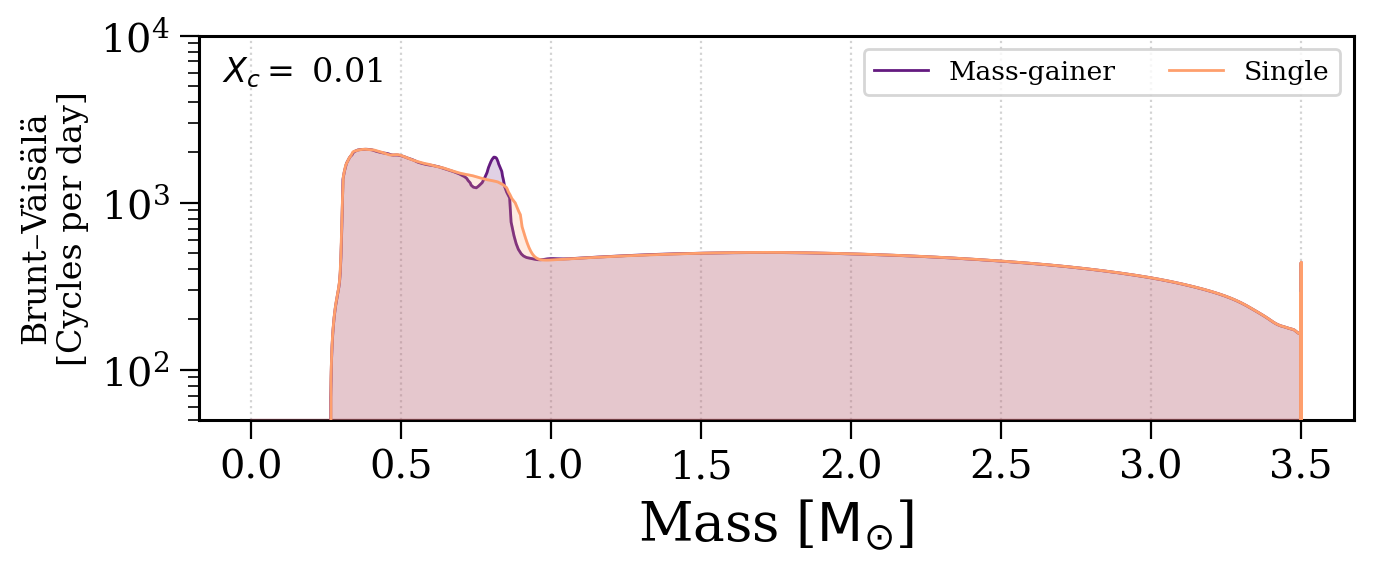

In [58]:
refresh_mpt()
for X_c in X_c_panels:
    fig, ax = mpt.plot_BV_profile(X_c=X_c, tracks=[D_mix_tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                                  show=False, label_with="an")
    ax.grid(axis="x", linestyle="dotted", color="lightgrey")

### Group of subplots

/afs/mpa/temp/tomwagg/kavli/notebooks/../helpers/profiles.py:111: UserWarning: The figure layout has changed to tight
  if show:


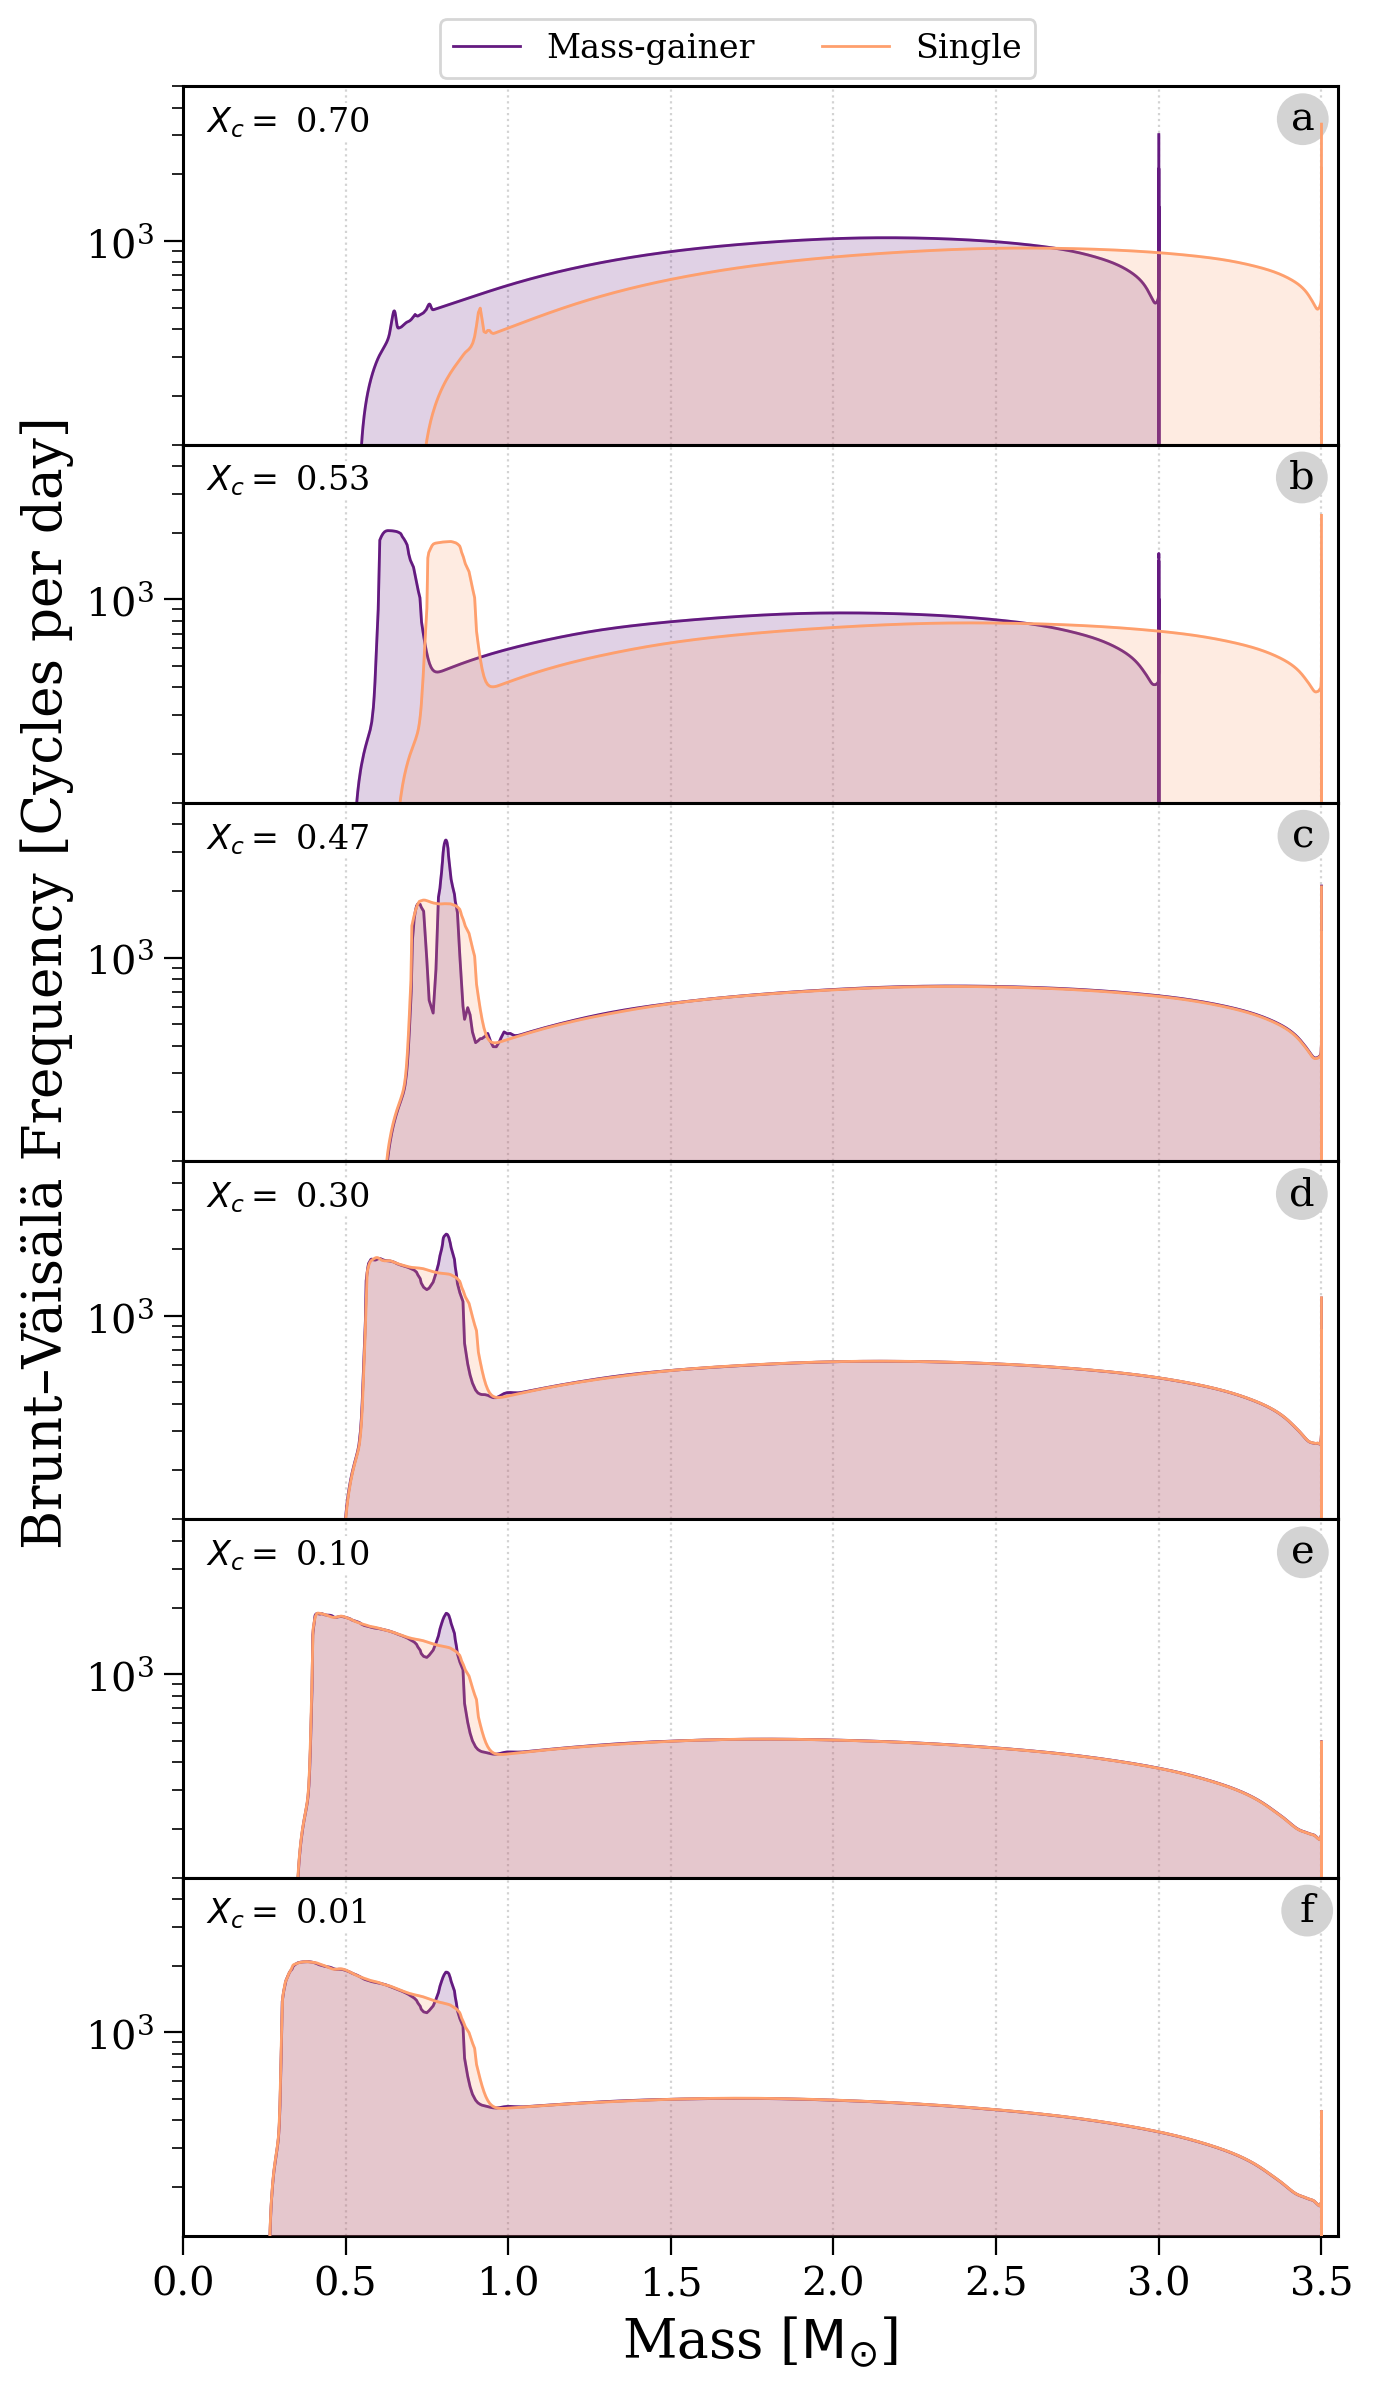

In [99]:
refresh_mpt()
fig, axes = plt.subplots(len(X_c_panels), 1, figsize=(7, 12), sharex=True)
for X_c, ax in zip(X_c_panels, axes):
    mpt.plot_BV_profile(X_c=X_c, tracks=[D_mix_tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                         fig=fig, ax=ax, show=False, label_with="an")
    ax.grid(axis="x", linestyle="dotted", color="lightgrey")

for ax, letter in zip(axes, "abcdef"):
    if ax != axes[-1]:
        ax.set_xlabel("")
    ax.set_ylabel("Brunt–Väisälä Frequency [Cycles per day]" if ax == axes[2] else "", fontsize=0.8*fs)
    ax.get_legend().remove()
    ax.set_xlim(0.0, 3.55)
    ax.set_ylim(1.2e2, 5e3)

    ax.annotate(letter, xy=(0.98, 0.96), xycoords="axes fraction", ha="right", va="top", fontsize=0.6*fs,
                bbox=dict(boxstyle="circle", fc="lightgrey", ec="lightgrey", pad=0.15))


fig.legend(*ax.get_legend_handles_labels(), loc="upper center", bbox_to_anchor=(0.55, 1, 0, 0),
           fontsize=0.5*fs, ncol=2)

fig.subplots_adjust(hspace=0.0, top=0.965)
plt.savefig("../paper/figures/BV_profile_all.pdf")
plt.show()

### By radius

/afs/mpa/temp/tomwagg/kavli/notebooks/../helpers/profiles.py:109: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


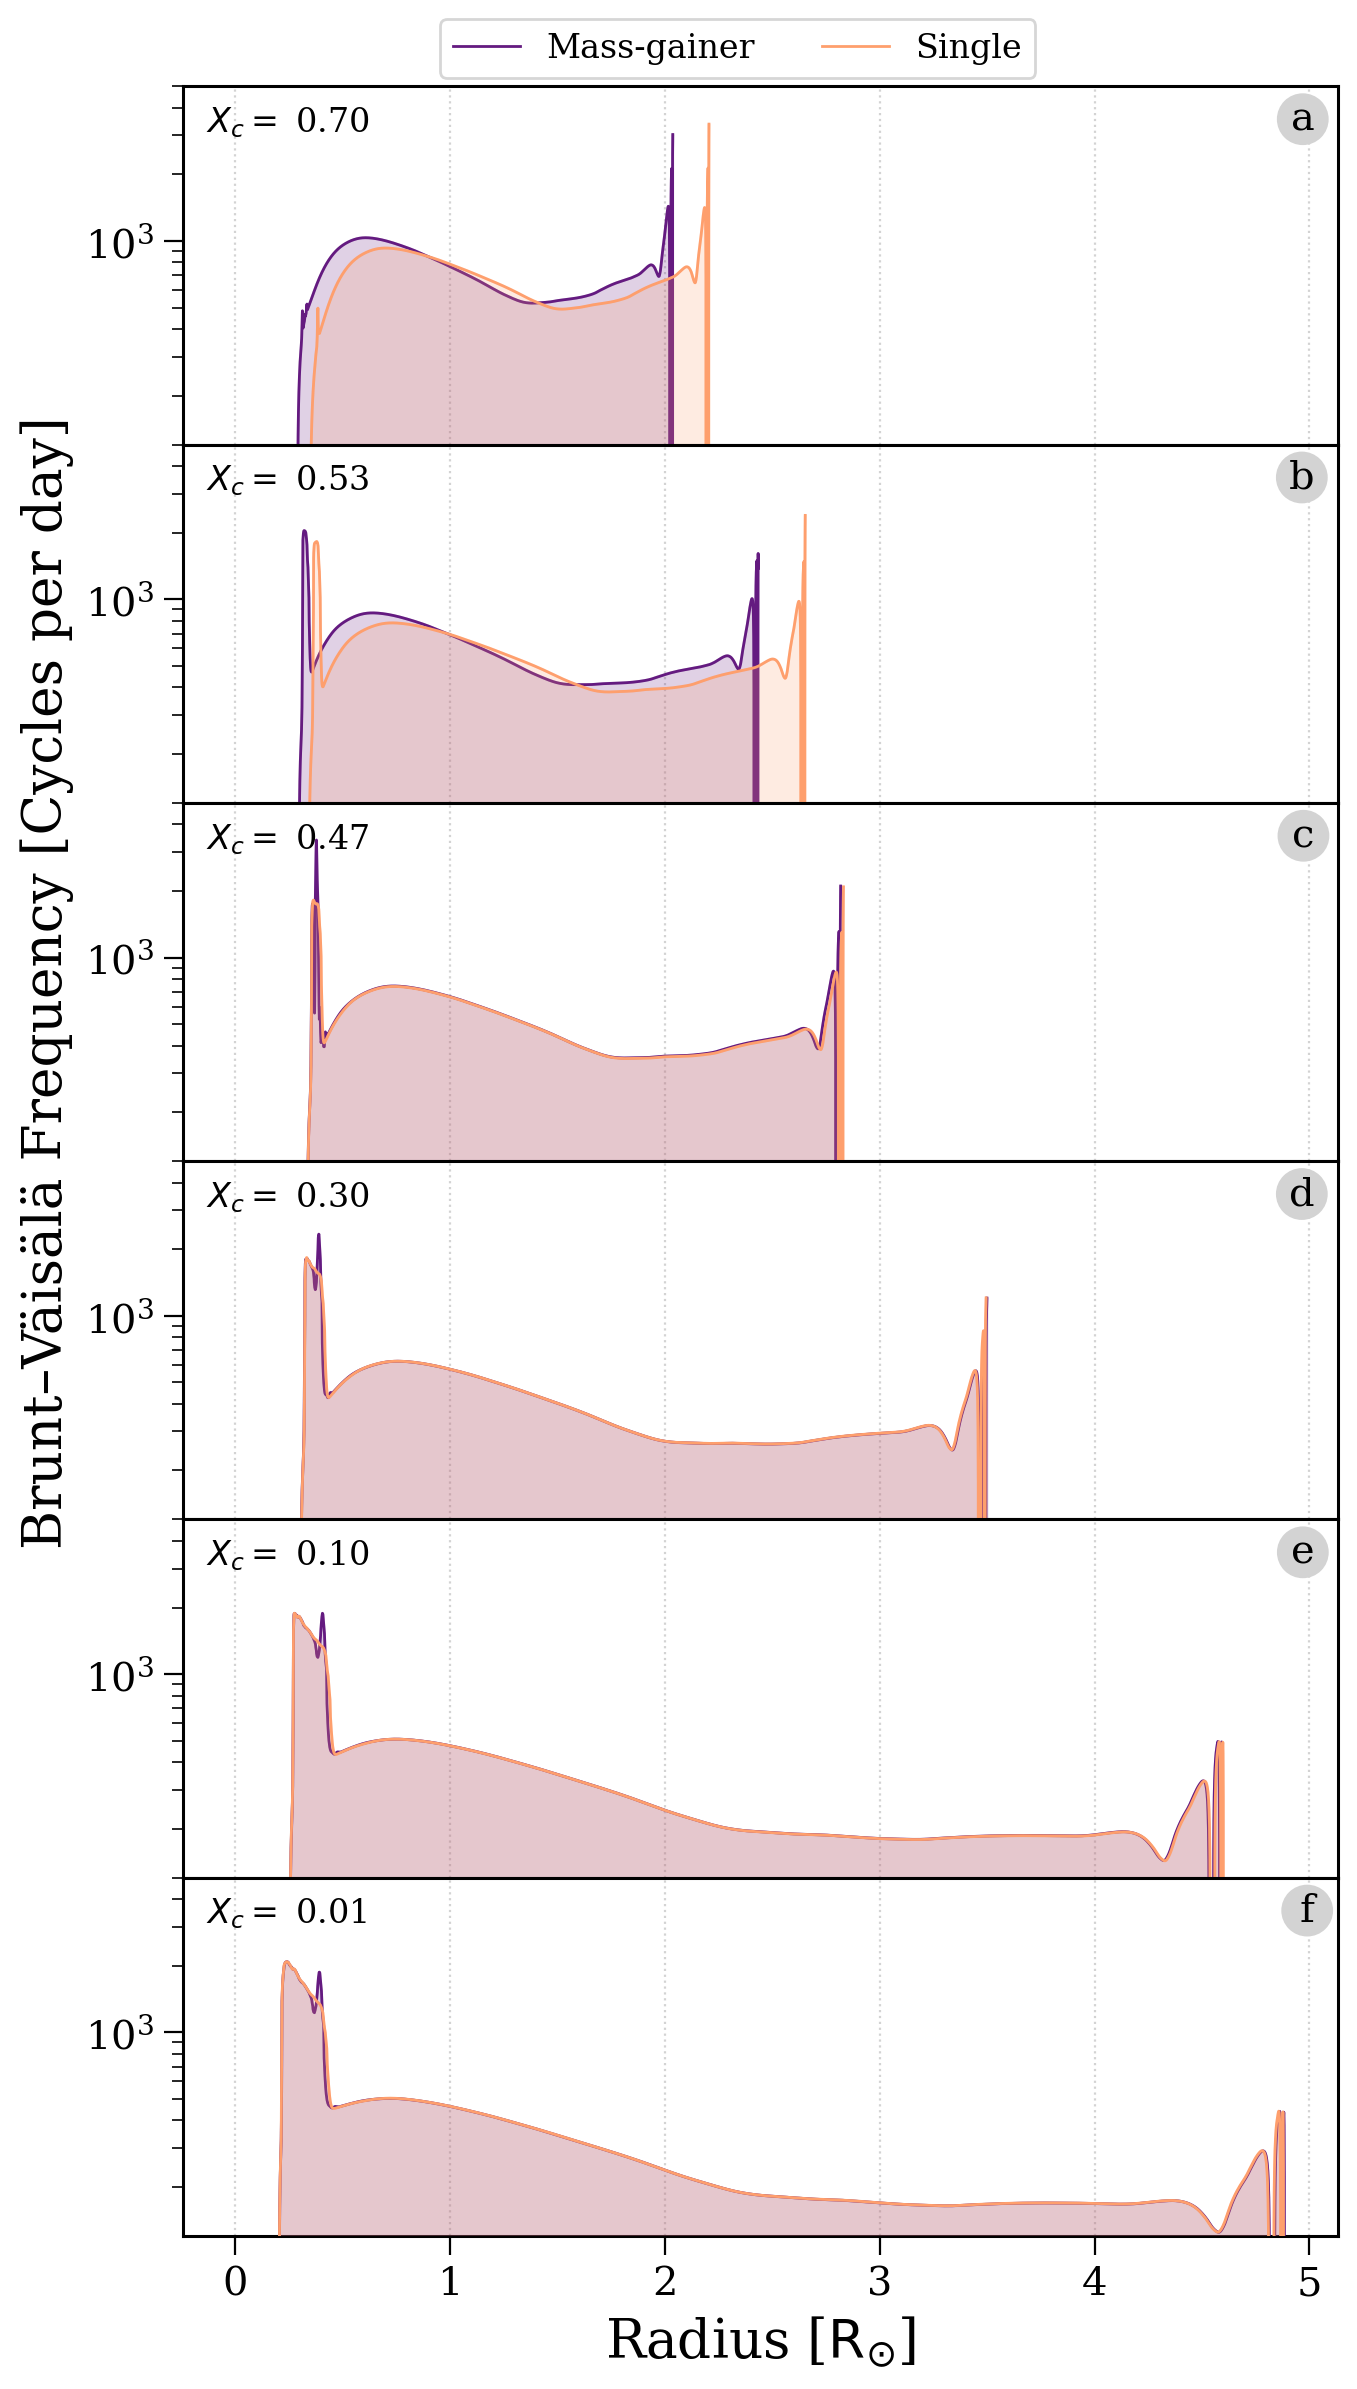

In [70]:
refresh_mpt()
fig, axes = plt.subplots(len(X_c_panels), 1, figsize=(7, 12), sharex=True)
for X_c, ax in zip(X_c_panels, axes):
    mpt.plot_BV_profile(X_c=X_c, tracks=[D_mix_tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                         fig=fig, ax=ax, show=False, label_with="an", radius=True)
    ax.grid(axis="x", linestyle="dotted", color="lightgrey")

for ax, letter in zip(axes, "abcdef"):
    if ax != axes[-1]:
        ax.set_xlabel("")
    ax.set_ylabel("Brunt–Väisälä Frequency [Cycles per day]" if ax == axes[2] else "", fontsize=0.8*fs)
    ax.get_legend().remove()
    # ax.set_xlim(0.0, 3.55)
    ax.set_ylim(1.2e2, 5e3)

    ax.annotate(letter, xy=(0.98, 0.96), xycoords="axes fraction", ha="right", va="top", fontsize=0.6*fs,
                bbox=dict(boxstyle="circle", fc="lightgrey", ec="lightgrey", pad=0.15))


fig.legend(*ax.get_legend_handles_labels(), loc="upper center", bbox_to_anchor=(0.55, 1, 0, 0),
           fontsize=0.5*fs, ncol=2)

fig.subplots_adjust(hspace=0.0, top=0.965)
# plt.savefig("../paper/figures/BV_profile_all.pdf")
plt.show()

### Combo

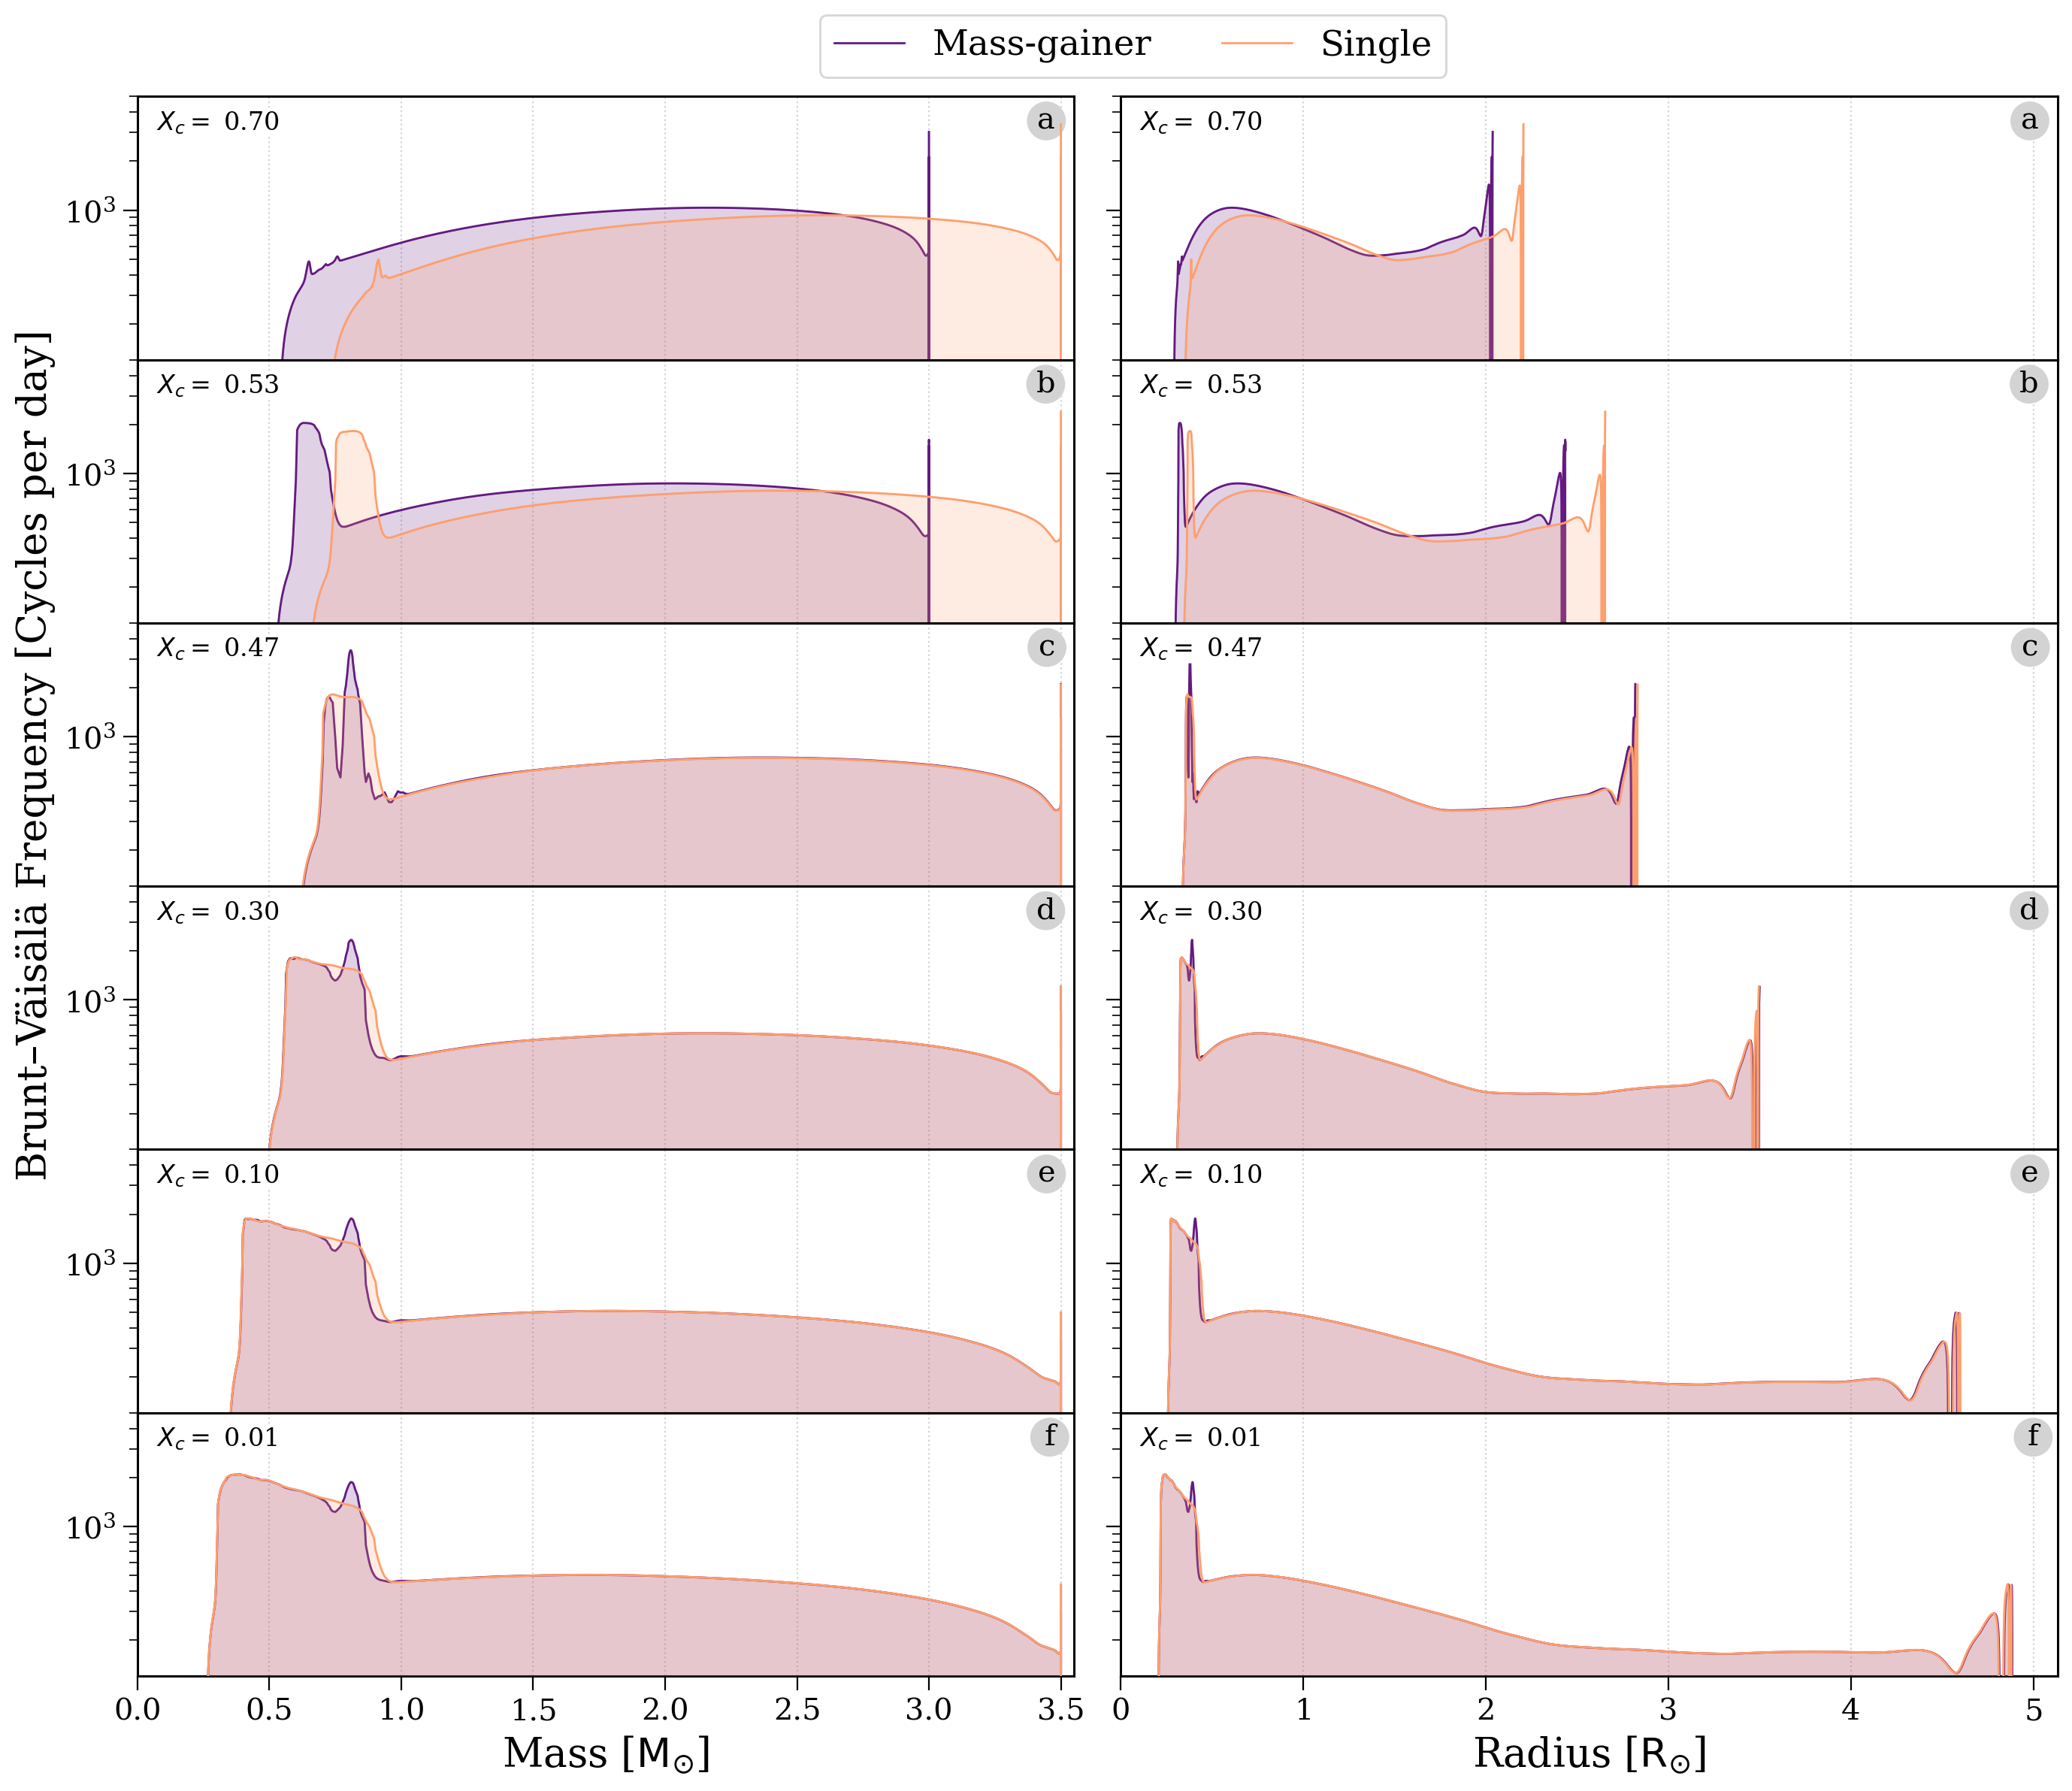

In [110]:
refresh_mpt()
fig, axes = plt.subplots(len(X_c_panels), 2, figsize=(14, 12), sharex='col', sharey=True)
for X_c, ax in zip(X_c_panels, axes[:, 0]):
    mpt.plot_BV_profile(X_c=X_c, tracks=[D_mix_tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                         fig=fig, ax=ax, show=False, label_with="an")
    ax.grid(axis="x", linestyle="dotted", color="lightgrey")

for X_c, ax in zip(X_c_panels, axes[:, 1]):
    mpt.plot_BV_profile(X_c=X_c, tracks=[D_mix_tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                         fig=fig, ax=ax, show=False, label_with="an", radius=True)
    ax.grid(axis="x", linestyle="dotted", color="lightgrey")

for ax, letter in zip(axes[:, 0], "abcdef"):
    if ax != axes[-1, 0]:
        ax.set_xlabel("")
    ax.set_ylabel("Brunt–Väisälä Frequency [Cycles per day]" if ax == axes[2, 0] else "", fontsize=0.8*fs)
    ax.get_legend().remove()
    ax.set_xlim(0.0, 3.55)
    ax.set_ylim(1.2e2, 5e3)

    ax.annotate(letter, xy=(0.98, 0.96), xycoords="axes fraction", ha="right", va="top", fontsize=0.6*fs,
                bbox=dict(boxstyle="circle", fc="lightgrey", ec="lightgrey", pad=0.15))

for ax, letter in zip(axes[:, 1], "abcdef"):
    if ax != axes[-1, 1]:
        ax.set_xlabel("")
    ax.set_ylabel("")
    ax.get_legend().remove()
    ax.set_xlim(left=0.0)
    ax.set_ylim(1.2e2, 5e3)

    ax.annotate(letter, xy=(0.98, 0.96), xycoords="axes fraction", ha="right", va="top", fontsize=0.6*fs,
                bbox=dict(boxstyle="circle", fc="lightgrey", ec="lightgrey", pad=0.15))


fig.legend(*ax.get_legend_handles_labels(), loc="upper center", bbox_to_anchor=(0.55, 1, 0, 0),
           fontsize=0.7*fs, ncol=2)

fig.subplots_adjust(hspace=0.0, wspace=0.05, top=0.945)
plt.savefig("../paper/figures/BV_profile_all_combo.pdf")
plt.show()

## Period spacing

In [60]:
refresh_mpt()

In [63]:
mpt.create_GYRE_bash(track=D_mix_tracks["D_20"][1], X_c=[0.69905, 0.69, 0.6, 0.53, 0.47, 0.4, 0.3, 0.2, 0.1, 0.01], change_folders=True)

cd ../output/cluster/binaries/Dmix_grid/D_20/LOGS_star2; echo -n 'profile1.data.GYRE,profile33.data.GYRE,profile67.data.GYRE,profile102.data.GYRE,profile953.data.GYRE,profile964.data.GYRE,profile980.data.GYRE,profile997.data.GYRE,profile1015.data.GYRE,profile1032.data.GYRE' | xargs -d ',' -P 6 -I {} /afs/mpa/temp/tomwagg/kavli/GYRE_submitter.sh -i {} -t 1 -e; cd -;


In [62]:
mpt.create_GYRE_bash(track=single_tracks_mdm20["M_3.5"], X_c=[0.69905, 0.69, 0.6, 0.53, 0.47, 0.4, 0.3, 0.2, 0.1, 0.01], change_folders=True)

cd ../output/cluster/singles_grid_mdm20/M_3.5/LOGS; echo -n 'profile6.data.GYRE,profile29.data.GYRE,profile48.data.GYRE,profile58.data.GYRE,profile66.data.GYRE,profile76.data.GYRE,profile92.data.GYRE,profile109.data.GYRE,profile127.data.GYRE,profile144.data.GYRE' | xargs -d ',' -P 6 -I {} /afs/mpa/temp/tomwagg/kavli/GYRE_submitter.sh -i {} -t 1 -e; cd -;


Parsing $D_{\rm min} = 20 \, {\rm cm^2 \, s^{-1}}$ (Accretor)


100%|██████████| 1046/1046 [00:10<00:00, 95.41it/s]


Parsing M_3.5


100%|██████████| 190/190 [00:01<00:00, 109.97it/s]


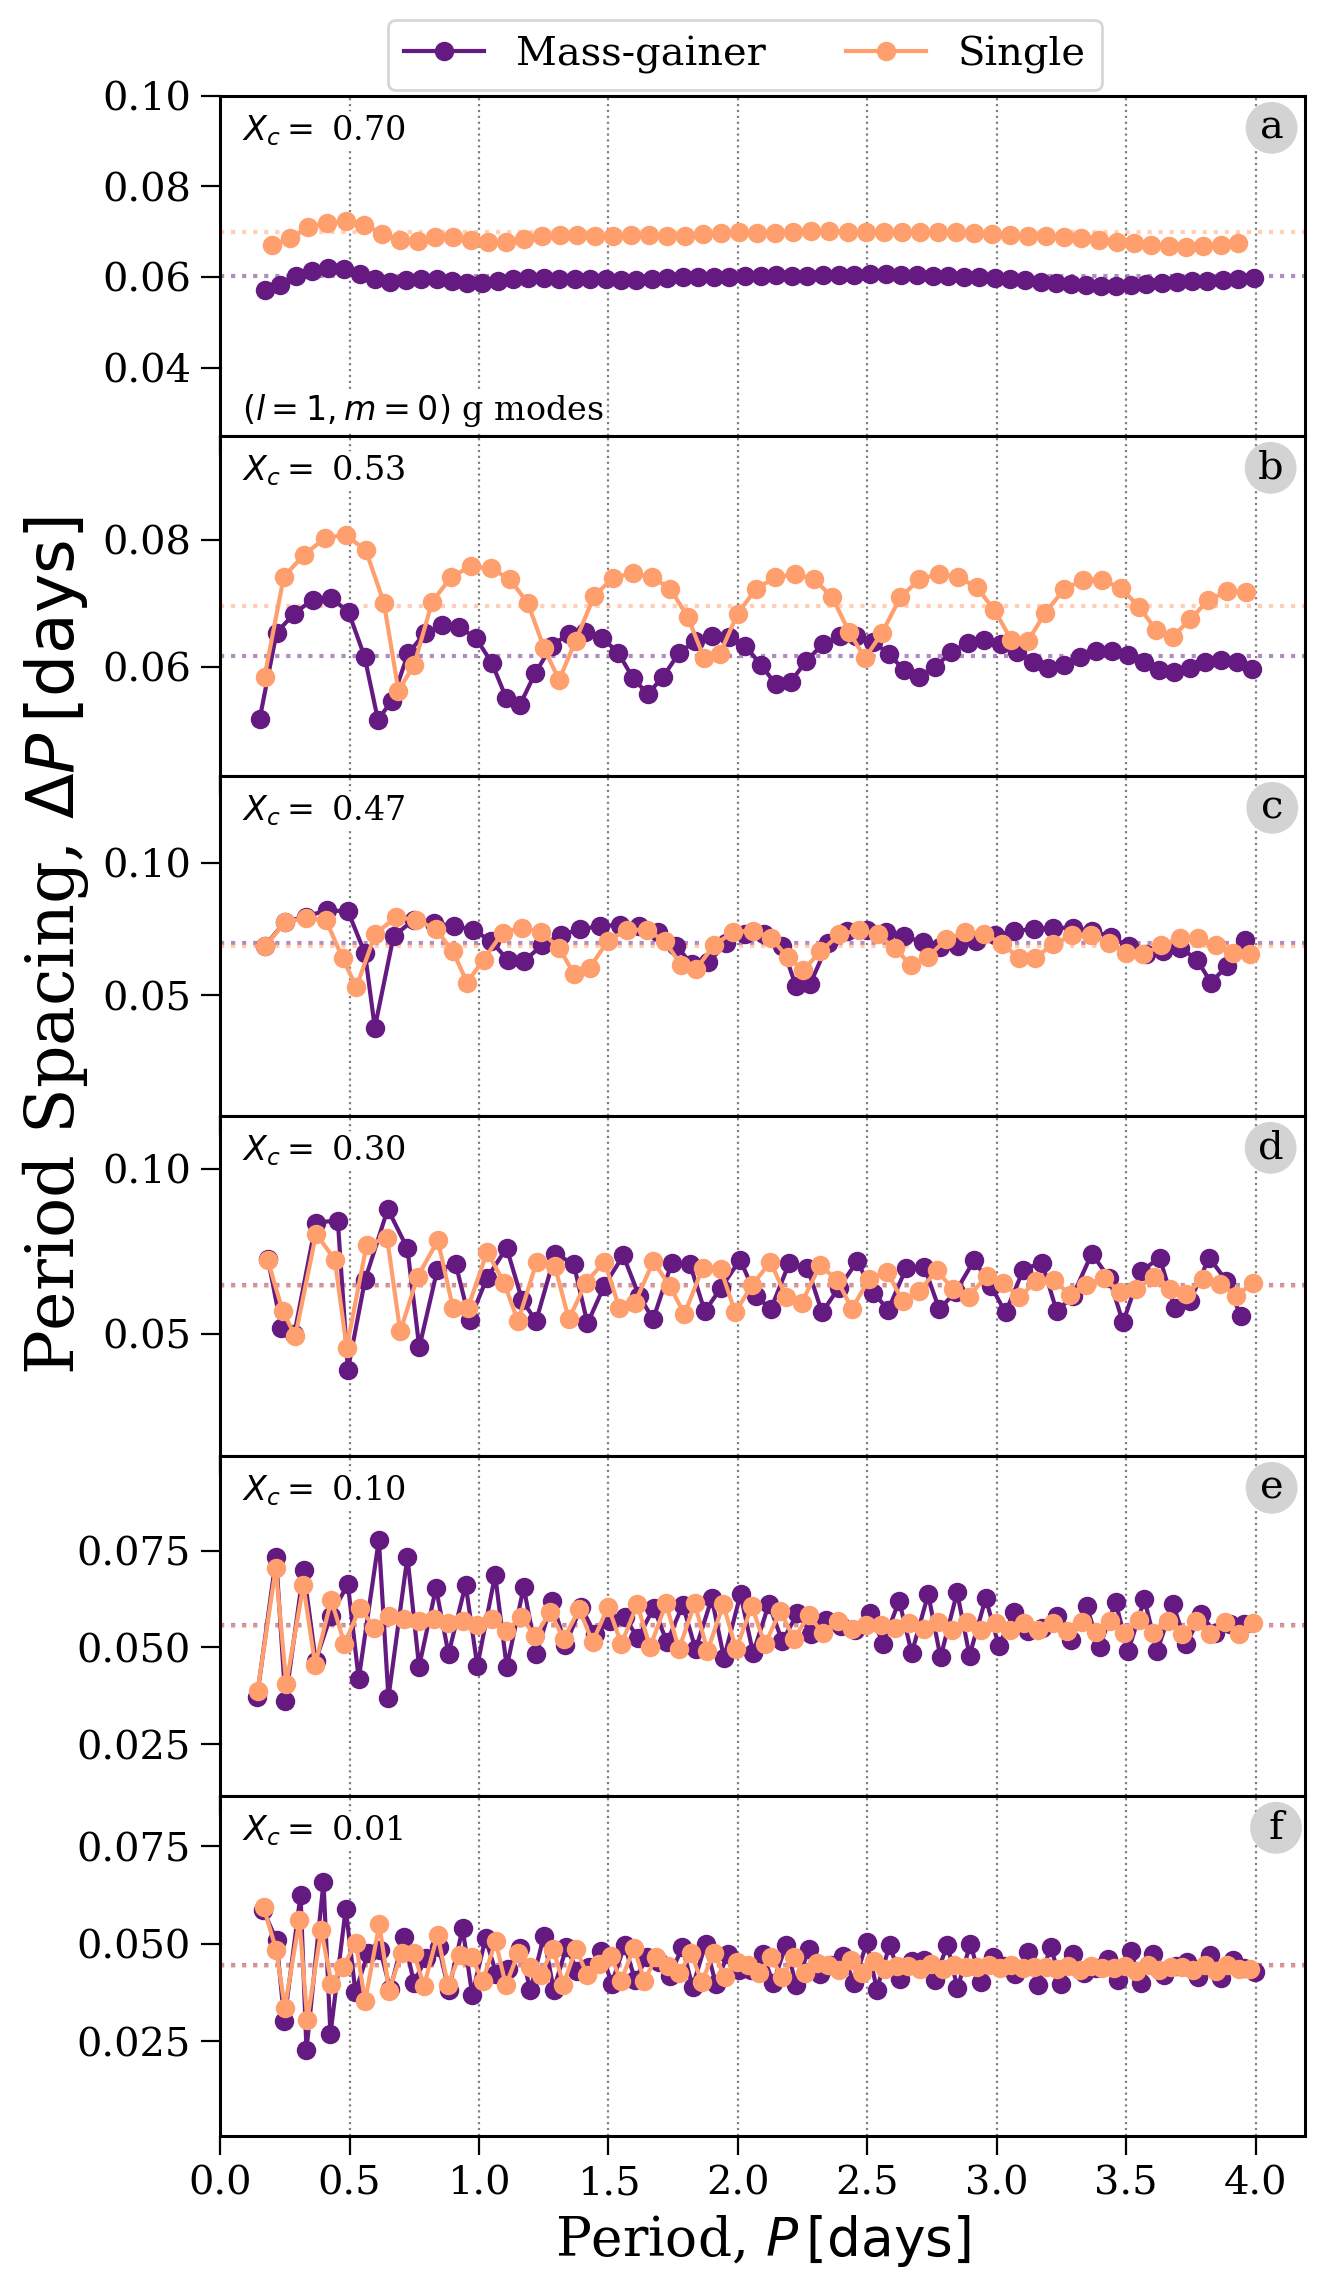

In [25]:
refresh_mpt()
fig, axes = plt.subplots(6, 1, figsize=(7, 12), sharex=True)

for X_c, ax in zip(X_c_panels, axes):
    mpt.plot_period_spacing(X_c=X_c, tracks=[D_mix_tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                            legend_loc="lower right", label_modes=False, mode_type=ax==axes[0],
                            fig=fig, ax=ax, show=False, divide_delta_n=False, ylims="auto")
    
for ax, letter in zip(axes, "abcdef"):
    ax.grid(axis='x', linestyle="dotted", color="grey")
    ax.set_xlim(left=0.0)
    ax.get_legend().remove()
    if ax != axes[-1]:
        ax.set_xlabel("")
    if ax == axes[2]:
        ax.set_ylabel(r"Period Spacing, $\Delta P \, [\rm days]$", fontsize=fs)
    else:
        ax.set_ylabel("")

    ax.annotate(letter, xy=(0.98, 0.96), xycoords="axes fraction", ha="right", va="top", fontsize=0.6*fs,
                bbox=dict(boxstyle="circle", fc="lightgrey", ec="lightgrey", pad=0.15))

fig.legend(*ax.get_legend_handles_labels(), ncol=2, loc="upper center", bbox_to_anchor=(0.5, 1, 0, 0))

axes[0].set_ylim(0.025, 0.1)

fig.subplots_adjust(hspace=0.0, top=0.96)

# plt.savefig("../paper/figures/period_spacing_mdm20.pdf", format="pdf", bbox_inches="tight")

plt.show()

# Appendix: `min_D_mix`

Here we explore how changing `min_D_mix` affects our results

## Brunt-Vaisala Comparison

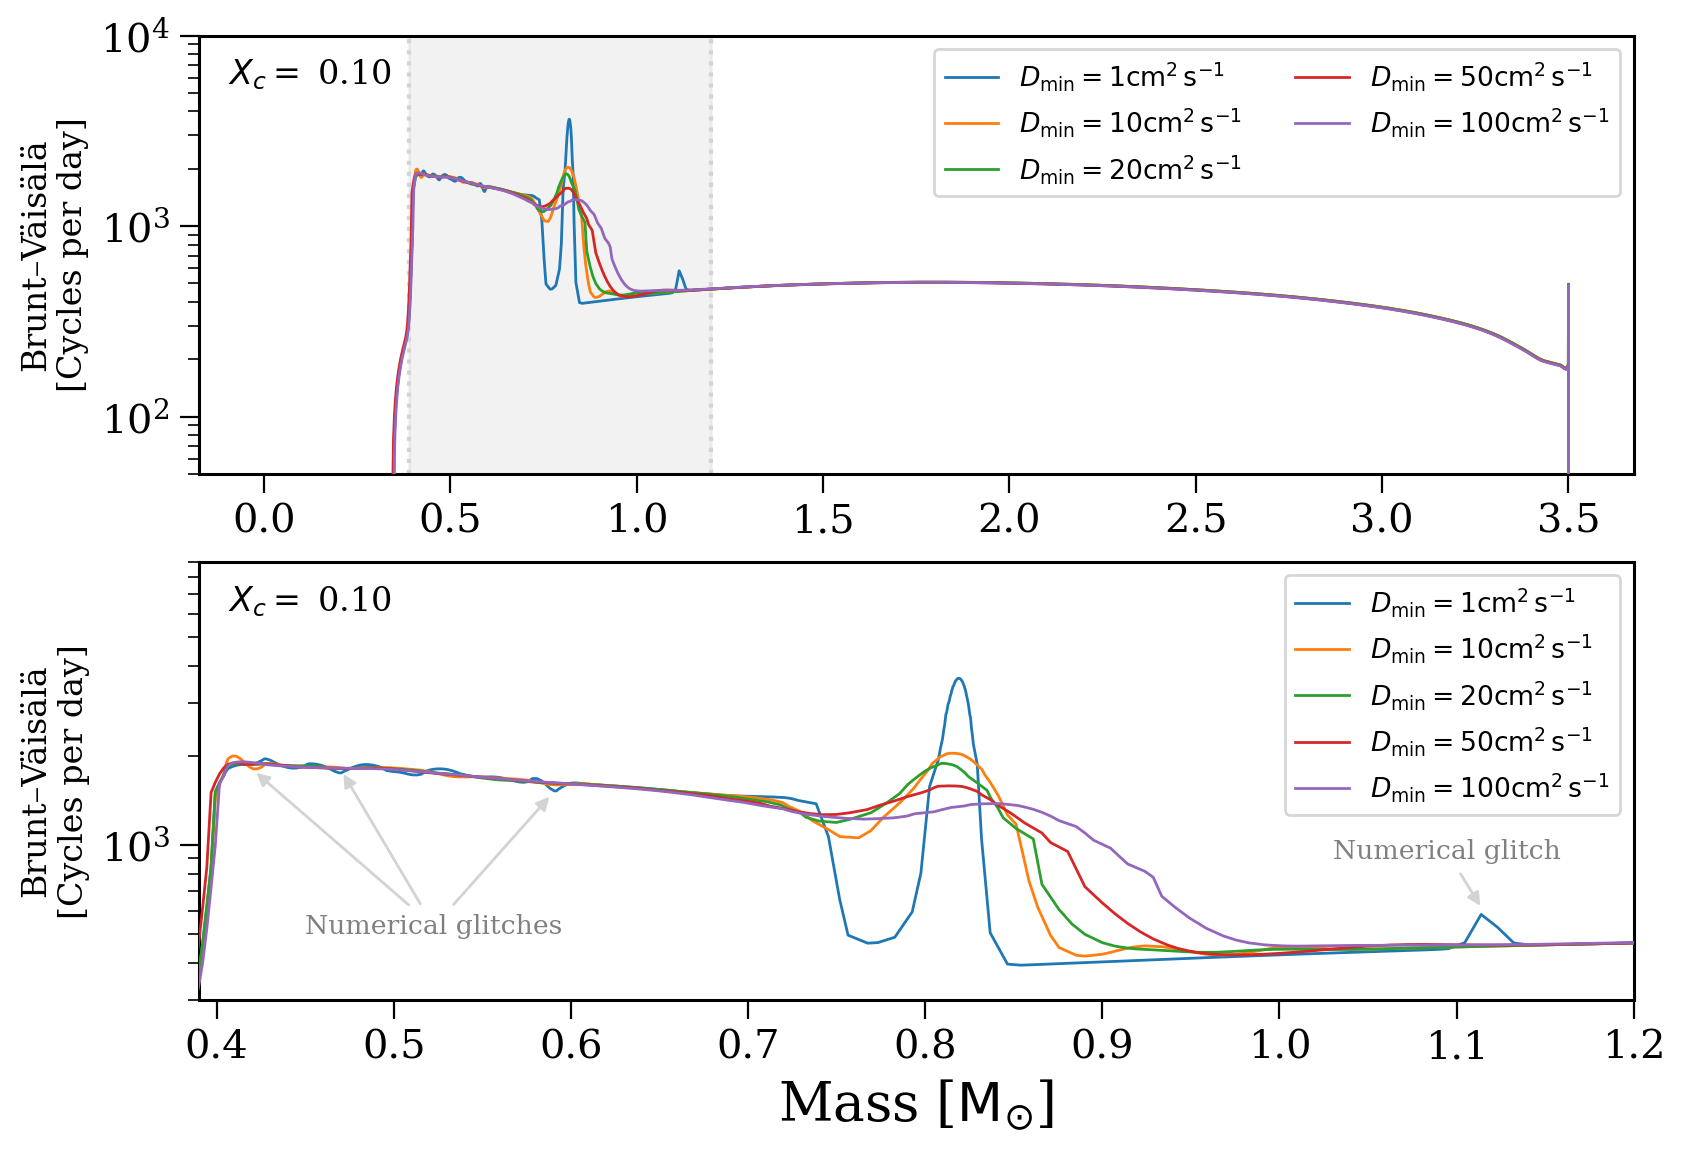

In [336]:
fig, axes = plt.subplots(2, 1, figsize=(9, 6.5))

fig, ax = mpt.plot_BV_profile(X_c=0.1,
                              tracks=list(reversed([tracks["4_3_5_mdm100"][1], tracks["4_3_5_mdm50"][1],
                                                    D_mix_tracks["D_20"][1],
                                                    tracks["4_3_5_mdm10"][1], tracks["4_3_5_mdm1"][1]])),
                              labels=list(reversed([r"$D_{\rm min} = 100 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 50 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 20 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 10 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 1 {\rm cm^{2} \, s^{-1}}$"])),
                              colours=[None, None, None, None, None], label_with="an", fill=False, show=False, fig=fig, ax=axes[0])

fig, ax = mpt.plot_BV_profile(X_c=0.1,
                              tracks=list(reversed([tracks["4_3_5_mdm100"][1], tracks["4_3_5_mdm50"][1],
                                                    D_mix_tracks["D_20"][1],
                                                    tracks["4_3_5_mdm10"][1], tracks["4_3_5_mdm1"][1]])),
                              labels=list(reversed([r"$D_{\rm min} = 100 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 50 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 20 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 10 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 1 {\rm cm^{2} \, s^{-1}}$"])),
                              colours=[None, None, None, None, None], label_with="an", fill=False, show=False, fig=fig, ax=axes[1], legend_loc="upper right")

ax.get_legend().remove()
ax.legend(ncol=1, fontsize=0.4*fs)

fig.subplots_adjust(hspace=0.2)

axes[0].set_xlabel("")
axes[0].axvline(0.39, linestyle="dotted", color="lightgrey")
axes[0].axvline(1.2, linestyle="dotted", color="lightgrey")
axes[0].axvspan(0.39, 1.2,  alpha=0.1, color="grey")

axes[1].set_xlim(0.39, 1.2)
axes[1].set_ylim(bottom=3e2, top=9e3)

def add_arrow(ax, text, start, end, hide_text=False):
    ax.annotate(text, xytext=start, xy=end,
                 arrowprops=dict(arrowstyle="-|>", color="lightgrey"),
                 color="grey" if not hide_text else "white", zorder=10, fontsize=0.4*fs)

add_arrow(axes[1], "Numerical glitches", (0.45, 5e2), (0.47, 1.8e3), hide_text=True)
add_arrow(axes[1], "Numerical glitches", (0.45, 5e2), (0.59, 1.5e3), hide_text=True)
add_arrow(axes[1], "Numerical glitches", (0.45, 5e2), (0.42, 1.8e3))


add_arrow(axes[1], "Numerical glitch", (1.03, 9e2), (1.115, 6e2))

# plt.savefig("../paper/figures/min_D_mix_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Period spacing pattern

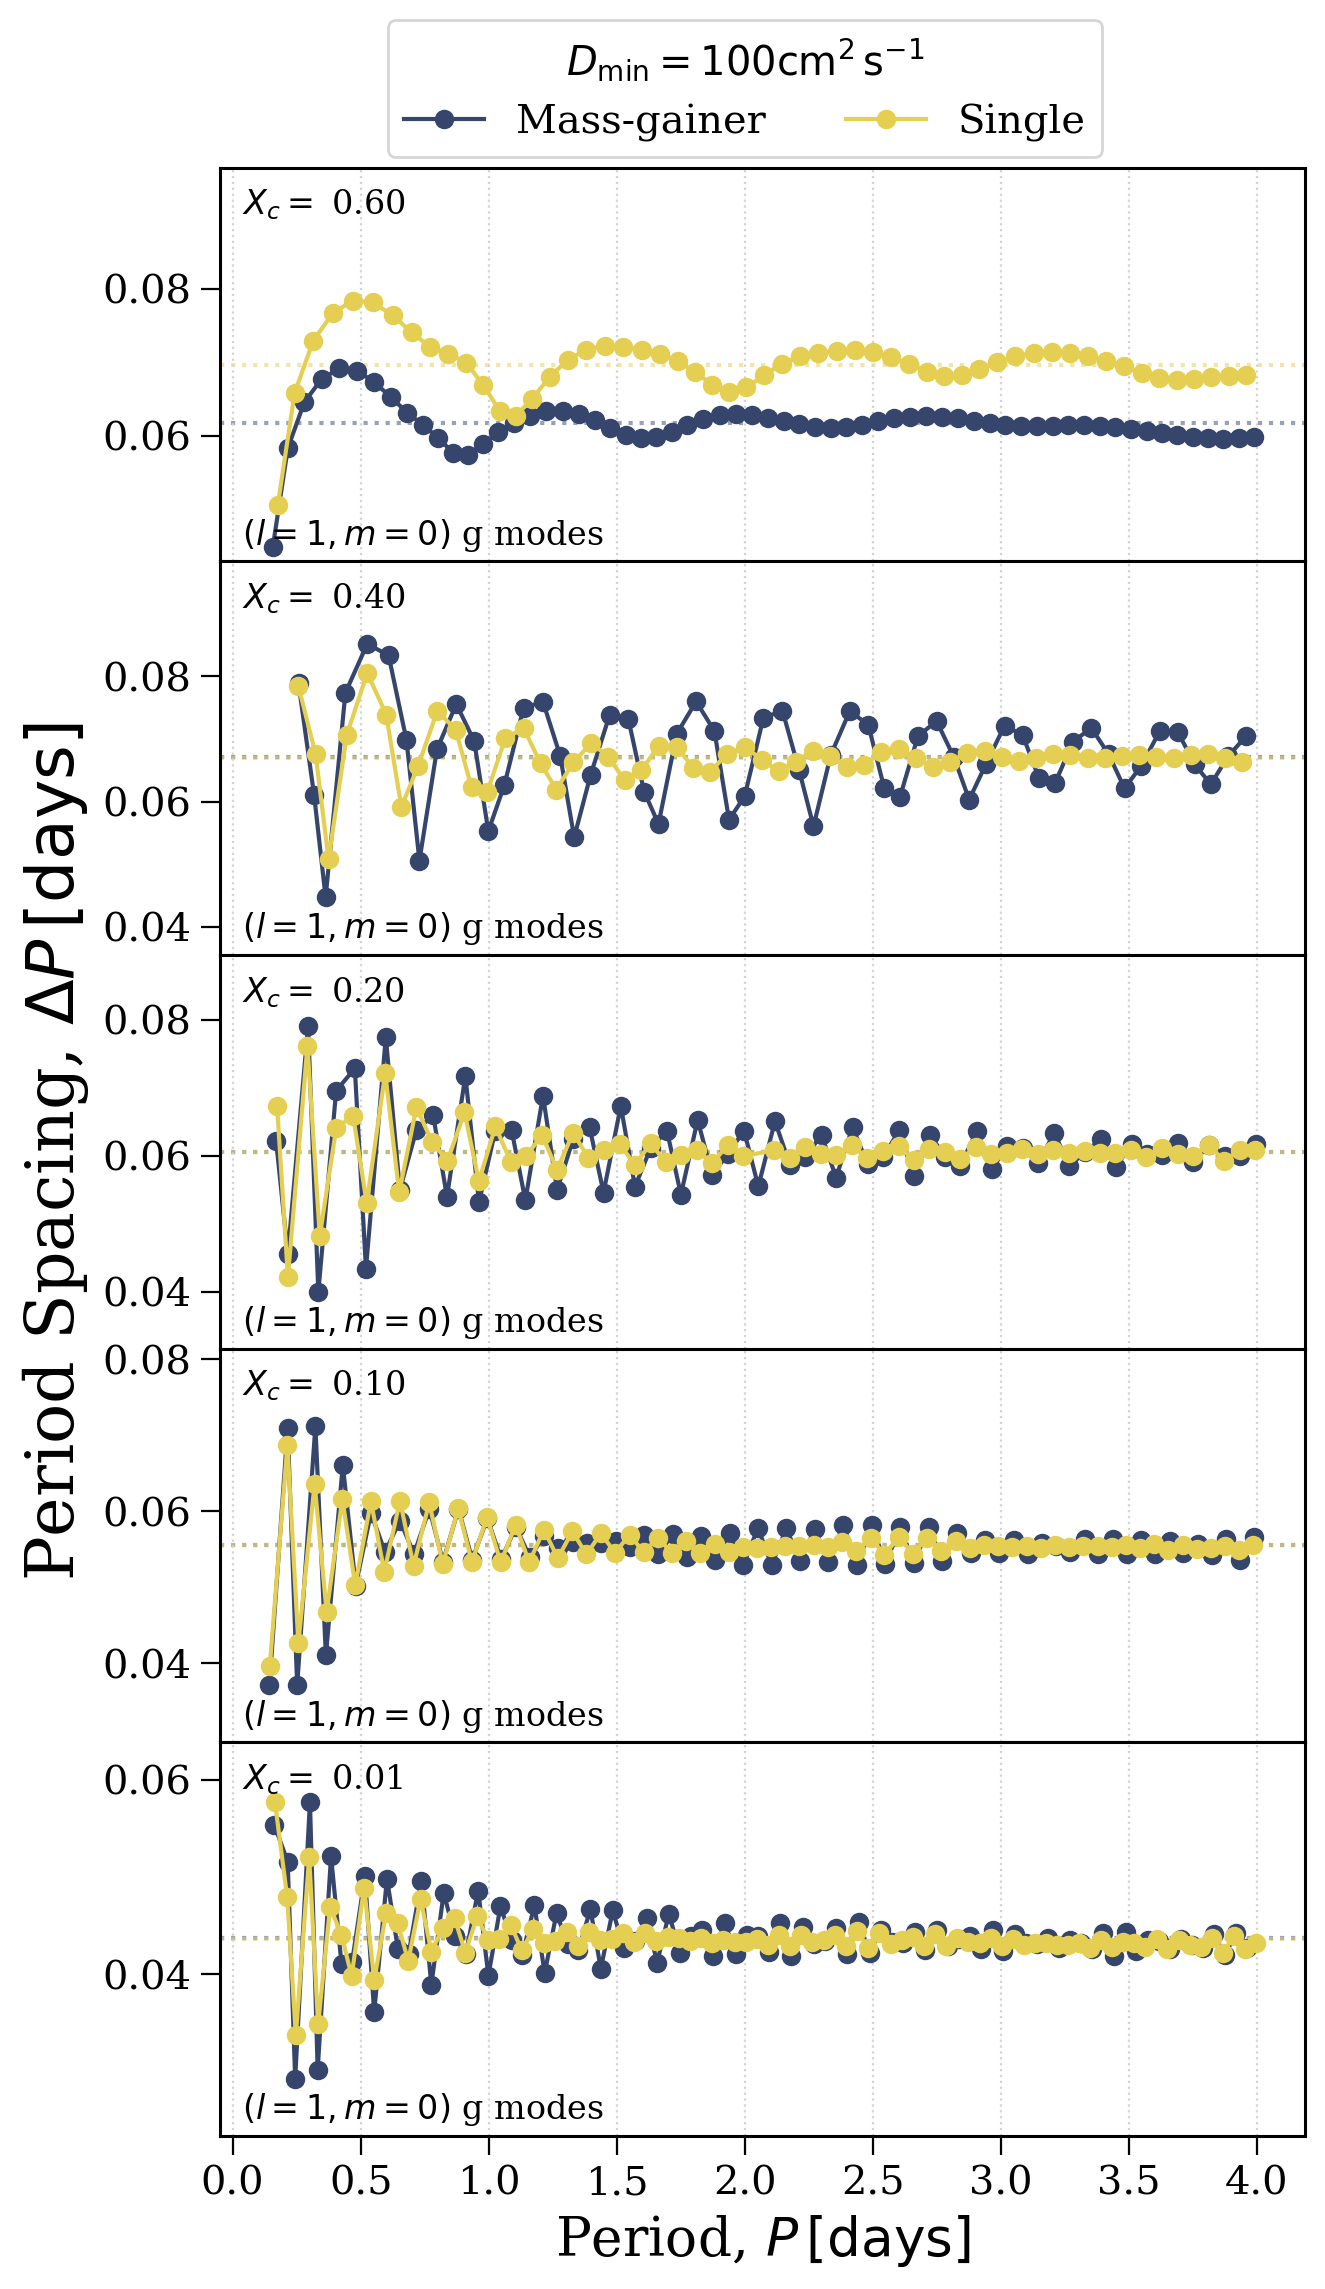

In [10]:
refresh_mpt()
fig, axes = plt.subplots(5, 1, figsize=(7, 12), sharex=True)

for X_c, ax in zip([0.6, 0.4, 0.2, 0.1, 0.01], axes):
    mpt.plot_period_spacing(X_c=X_c, tracks=[tracks["4_3_5_mdm100"][1], single_tracks["M_3.5"]],
                            colours=[plt.get_cmap("cividis")(0.2), plt.get_cmap("cividis")(0.9)],
                            labels=["Mass-gainer", "Single"],
                            legend_loc="lower right", label_modes=False, fig=fig, ax=ax, show=False,
                            divide_delta_n=True, ylims="auto", ylim_auto_fac=1.4)
    
for ax in axes:
    ax.grid(axis='x', linestyle="dotted", color="lightgrey")
    ax.get_legend().remove()
    if ax != axes[-1]:
        ax.set_xlabel("")
    if ax == axes[2]:
        ax.set_ylabel(r"Period Spacing, $\Delta P \, [\rm days]$", fontsize=fs)
    else:
        ax.set_ylabel("")

leg = fig.legend(*ax.get_legend_handles_labels(), ncol=2, loc="upper center", bbox_to_anchor=(0.5, 1, 0, 0),
                 title=r"$D_{\rm min} = 100 {\rm cm^{2} \, s^{-1}}$")
plt.setp(leg.get_title(),fontsize=0.6*fs)

fig.subplots_adjust(hspace=0.0, top=0.93)

# plt.savefig("../paper/figures/period_spacing_mdm100.pdf", format="pdf", bbox_inches="tight")
plt.savefig("presentation_plots/period_spacing_mdm100.png", format="png", bbox_inches="tight", dpi=300)

plt.show()